### Name : Mohaideen Abdul Kader
### Mail ID : mohai.2007@gmail.com

# ---------------------------------      EDL Final Project      --------------------------------------------

## Problem Definition

### Final Project: Building Basic predictive models over the NYC Taxi Trip dataset.
  You are provided with the NYC Taxi Trip Dataset. This dataset contains information about the taxi trips
that took place in different parts of New York City and how much time did that trip take to complete.
In this project, the following are the tasks you must complete and submitted.
1. Choose the most suitable evaluation metric and state why you chose it.
2. Build a benchmark model for the given dataset.
3. Build a K-Nearest neighbours’ model for the given dataset and find the best value of K.
4. Build a Linear model for the given dataset with regularisation. Attempt to interpretthe variable coefficients of the Linear Model.
5. Build a Decision tree model for the given dataset. Attempt to interpret the variableimportance.
6. Plot the following Bar plots:
     train score of all the above models.
     test (not validation!) score of all the above models.
     Attempt to explain the observations from the plots (optional)

#### Loading Necessary Libraries

In [1]:
# Essential libraries
import numpy as np
import pandas as pd

#Visualization libraries
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

#other libraries
from datetime import timedelta
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
sns.set()

#### Importing .CSV Project file

In [2]:
# Using pandas opening csv file in python
data = pd.read_csv("nyc_taxi_trip_duration.csv")     

#first 5 data points using "head()" function
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


## Variable Identification and Typecasting

In [3]:
#finding out the shape of the data using "shape" variable: Output (rows, columns)
print('We have {} rows.'.format(data.shape[0]))
print('We have {} columns'.format(data.shape[1]))
data.iloc[1,:]

We have 729322 rows.
We have 11 columns


id                              id0889885
vendor_id                               1
pickup_datetime       2016-03-11 23:35:37
dropoff_datetime      2016-03-11 23:53:57
passenger_count                         2
pickup_longitude               -73.988312
pickup_latitude                 40.731743
dropoff_longitude              -73.994751
dropoff_latitude                40.694931
store_and_fwd_flag                      N
trip_duration                        1100
Name: 1, dtype: object

In [4]:
#Printing all the columns present in data
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

#### Dataset Informations

In [5]:
# Printing all the information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


* There is no null values.                       
* Date time datas is in object convert to the pandas recognized datetime formet

#### Integer Data Type

In [6]:
# Identifying variables with integer datatype
data.dtypes[data.dtypes == 'int64']

vendor_id          int64
passenger_count    int64
trip_duration      int64
dtype: object

* vendor_id need to convert category
* passenger_count need to convert category
* Trip duration is target variable

#### Float Data Types

In [7]:
# Identifying variables with float datatype
data.dtypes[data.dtypes == 'float']

pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
dtype: object

* Geo location details are in float64

#### Object Data Type

In [8]:
# Identifying variables with object datatype
data.dtypes[data.dtypes == 'object']

id                    object
pickup_datetime       object
dropoff_datetime      object
store_and_fwd_flag    object
dtype: object

* id are nominal data which is not have any importance
* date time object to convert pandas datetime object
* store and fwd flag to convert categorical variable

#### Description of the Data

In [9]:
data.describe(include="all")

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
count,729322,729322.000000,729322,729322,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322,7.293220e+05
unique,729322,NaN,709359,709308,NaN,NaN,NaN,NaN,NaN,2,NaN
top,id1080784,NaN,2016-02-24 12:04:42,2016-02-19 19:25:04,NaN,NaN,NaN,NaN,NaN,N,NaN
freq,1,NaN,4,4,NaN,NaN,NaN,NaN,NaN,725282,NaN
mean,NaN,1.535403,NaN,NaN,1.662055,-73.973513,40.750919,-73.973422,40.751775,NaN,9.522291e+02
std,NaN,0.498745,NaN,NaN,1.312446,0.069754,0.033594,0.069588,0.036037,NaN,3.864626e+03
min,NaN,1.000000,NaN,NaN,0.000000,-121.933342,34.712234,-121.933304,32.181141,NaN,1.000000e+00
25%,NaN,1.000000,NaN,NaN,1.000000,-73.991859,40.737335,-73.991318,40.735931,NaN,3.970000e+02
50%,NaN,2.000000,NaN,NaN,1.000000,-73.981758,40.754070,-73.979759,40.754509,NaN,6.630000e+02
75%,NaN,2.000000,NaN,NaN,2.000000,-73.967361,40.768314,-73.963036,40.769741,NaN,1.075000e+03


##### * Location Details (Base feature)
        The location is in Digital converted formet so we can use directly in implementation
        This information we can measure the distance between two places and find out the trip duration
        
##### * Trip duration (Target)
        Trip_duration 75% is 1075 but max value is very high, and also std is higher than mean.                            
        The minimum value is 1 seconds
##### * Passenger count
        Passenger count 75% is only 2 but the maximum value is 9(Outliers).
        The minimum value is 0 (without passenger,This value must removed from dataset)
##### * Vendor ID
        Vendors is only 1 and 2 (so i change it to category)
##### * Store and Fwd Flag
        Its has only Y or N values.              
        converted these values to 1 and 2.
##### * Date time
        This data has Stamp datetime(which we can get time level analysis).            
        Month, Days, Hours is usefull details.
        Thid data is 6 months of data from January 2016 to June 2016
        Total 7 lacks unique records in the date field
        Dropoff datetime only available when trips ends is not necessary for prediction
##### * ID
        id is the nominal columns which has no importance in predictions

## Exploratory Data Analysis
Let's check the data files! According to the data description we should find the following columns:

* id               - a unique identifier for each trip      
* vendor_id        - a code indicating the provider associated with the trip record     
* pickup_datetime  - date and time when the meter was engaged    
* dropoff_datetime - date and time when the meter was disengaged    
* passenger_count  - the number of passengers in the vehicle (driver entered value)    
* pickup_longitude - the longitude where the meter was engaged    
* pickup_latitude  - the latitude where the meter was engaged   
* dropoff_longitude - the longitude where the meter was disengaged   
* dropoff_latitude  - the latitude where the meter was disengaged     
* store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor        because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)    
* trip_duration     - (target) duration of the trip in seconds    

Here, we have 2 variables dropoff_datetime and store_and_fwd_flag which are not available before the trip starts and hence will not be used as features to the model

### Hypothesis Generation
                            
#### Date:               
__Which day of the week cab is highly demand.                  
__What are the heavy demanding season of the year.            
__Which part of the day has highly demand.
#### vendor_id:                          
__Which vendor got maximum number of rides.                         
__Which vendor provide service has highly preferred cab service in peak hours.                  
#### Passenger Count:                
__How many trip the number of passenger travels most.                
__The passenger count has relation between travel durations.
__is High passenger count travel long durations?
__What pickuplocation has lowest passengers booked
#### Geolocation:             
__Do passenger prefer shortest or longest rides.                   
__which geolocation have highly demands pickups.  
__Some underlying locations has traffic or road or some other reasons for longer durations
#### Trip Duration:                         
__Any trips unnecceserily longer duration.                    
__Trip duration distribusion across all trips.

### Observation before univariate
    * Day -- Gives us information about Day, Month and Year 
    * Timestamps -- Gives us information about Time of the Day                          
    * Latitude Longitudes are geolocation coordinates                        
    * Geolocation details gives us information about City's demands areas and Distance datas

## Data Exploration and Transformation
### Extracting Information using Pickup DateTime and Mapping Values

In [3]:
#Mapping Y and N  to the dummy variable 1's and 0's
data["store_and_fwd_flag"] = data["store_and_fwd_flag"].map({"Y":1,"N":0}) 

# Changing object to datetime
data["pickup_datetime"] = pd.to_datetime(data.pickup_datetime)    
data["dropoff_datetime"] = pd.to_datetime(data.dropoff_datetime) 

# Create month,week,hour seperated to the columns
data["month"] = data["pickup_datetime"].dt.month                  
data["day_of_week"] = data["pickup_datetime"].dt.weekday + 1          
data["hour_of_day"] = data["pickup_datetime"].dt.hour   

#### Creating Bins for Hour of Day Values

In [4]:
# Creating new column which have time seperated by 4 hours intervel
data['hour_bins'] = pd.cut(data['hour_of_day'],bins=(-0.1,4,8,12,16,20,24))

#### Converting Columns to Category

In [5]:
# converting categories
data['vendor_id'] = data['vendor_id'].astype('category')
data['day_of_week'] = data['day_of_week'].astype('category')
data['month'] = data['month'].astype('category')

In [13]:
# Numerical datatypes
data.select_dtypes(include=['category']).dtypes

vendor_id      category
month          category
day_of_week    category
hour_bins      category
dtype: object

#### Dropping ID Column

In [6]:
# Drop id
data = data.drop(['id'],axis=1)

* Dropping the ID columns, Its an nominal which has only like indexes.

In [15]:
data.passenger_count.value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: passenger_count, dtype: int64

* Passenger count has 32 number of 0 values and 1 values each in 7 and 9
* This must be an outlier

In [16]:
data.month.value_counts()

3    128316
4    125634
5    124201
2    119364
6    117406
1    114401
Name: month, dtype: int64

* Months Values are Normal

### Seperating Hours by Periods
#### Function for Finding Periods of Day

In [7]:
# Defining function which returns the divisions of the whole day into 4 parts
def time_periods(t):
    if t >= dt.time(4, 0, 1) and t <= dt.time(10, 0, 0):
        return "morning"
    elif t >= dt.time(10, 0, 1) and t <= dt.time(16, 0, 0):
        return "afternoon"
    elif t >= dt.time(16, 0, 1) and t <= dt.time(22, 0, 0):
        return "evening"
    elif t >= dt.time(22, 0, 1) or t <= dt.time(4, 0, 0):
        return "night"

* The above function which is return what period of day using time stamp

#### Creating Lambda Function to Iterate Over Rows to Find Periods using Periods Function

In [8]:
# using lambda function to interprete the function to returns the time periods
data["pickup_periods"] = data["pickup_datetime"].apply(lambda x : time_periods(dt.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()))
data["dropoff_periods"] = data["dropoff_datetime"].apply(lambda x : time_periods(dt.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()))

* Above lambda function return day of periods and store it in dataframe

# Univariate Analysis

#### Assigning Numeric and Categorical Columns Values to the Variable

In [19]:
# Assigning Numerical and Categorical variables
numeric = ['passenger_count','trip_duration','hour_of_day']
location_p = ['pickup_longitude','pickup_latitude']
location_d = ['dropoff_longitude','dropoff_latitude']
category = ['vendor_id','month','day_of_week']
periods =['pickup_periods','dropoff_periods']

### Univariate Analysis for Numerical Features
#### Function for Plotting Numerical Features

In [20]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  ''' 
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 150)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))


#### Numerical Features

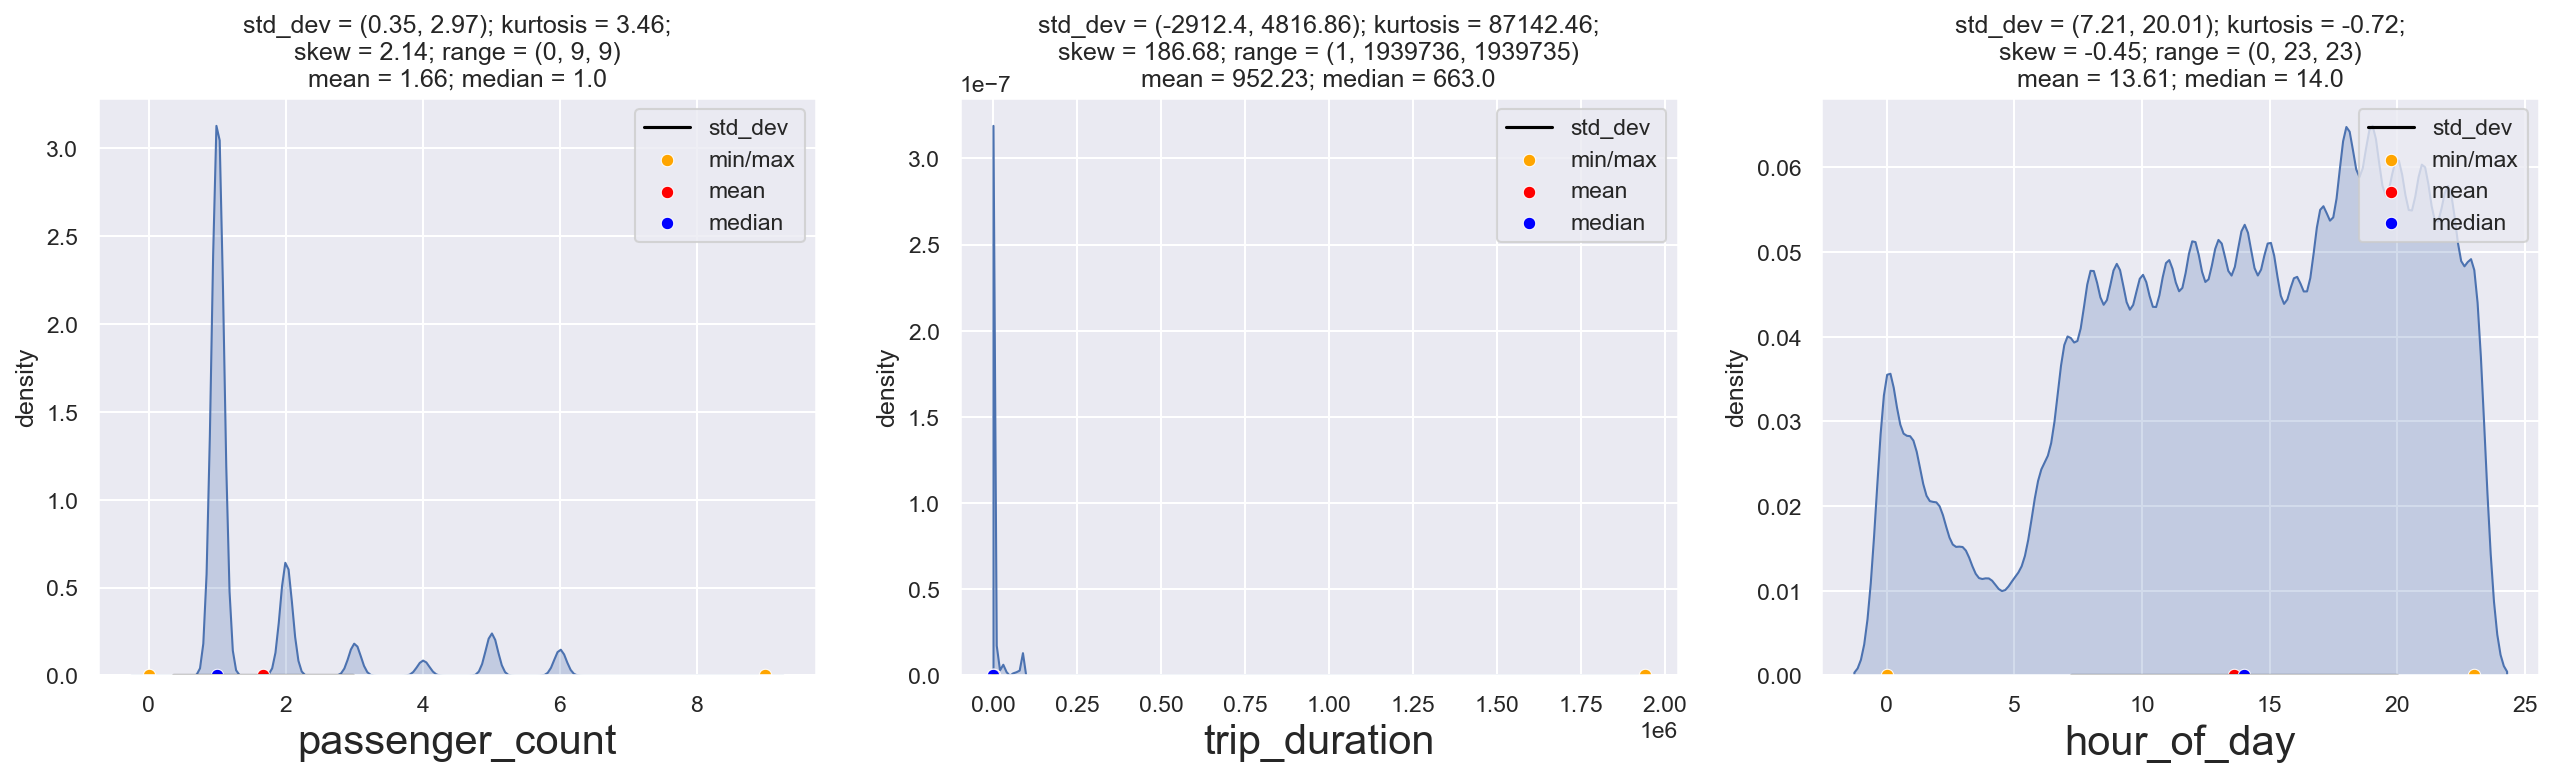

In [21]:
UVA_numeric(data,numeric)

* Passenger count
        Maximum of the time 1 passengers only traveled.                    
        0 passenger is not appropriate value.                  
        above 6 passenger is very less in numbers.             
        right skewed,median is 1.               
* trip_duration
        The mean is 952 seconds but the maximum value is high.                    
        the std is verty large compare to the mean.                    
        highly right skewed.                  
        kurtosis value is very much high.                        
* pickup hour
        At midnight pickups is low compare to the evening time.                             
        The mean and median pointing almost same time.                           
* The outliers treatment is must for futher analysis

#### Location Features

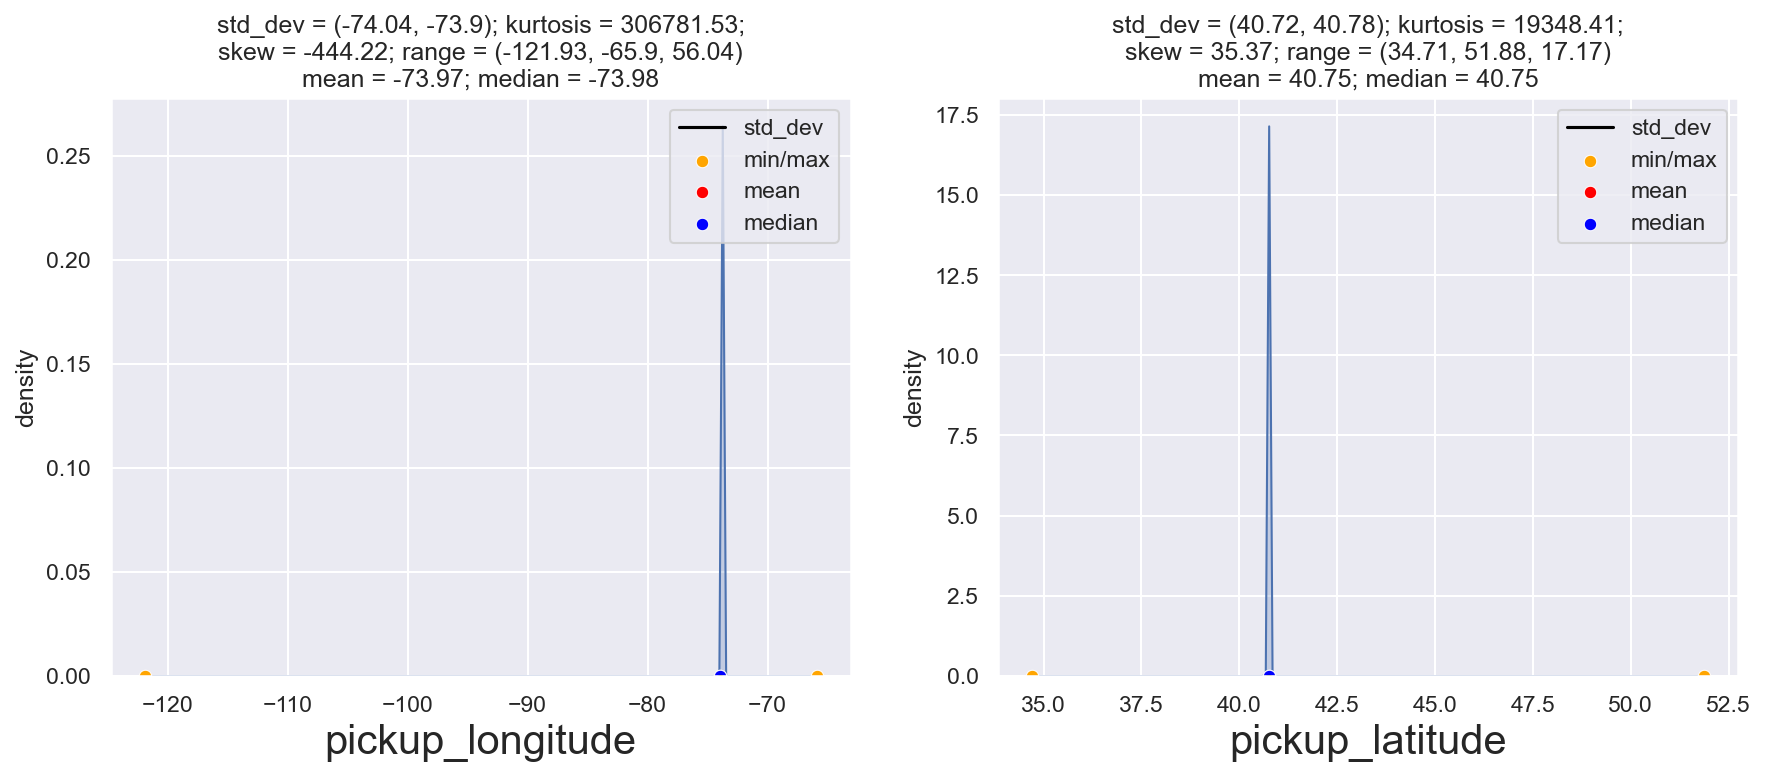

In [22]:
UVA_numeric(data,location_p)

* Pickup Longitude and Latitude
        longitude is left skewed.                          
        the geo location range in -121.9 to -65.9 but the std is -74 to -73.9                    
        Mean and Medians are in same place                 
        latitude are right skewed                 
        the geo location range in 34.7 to 51.8 but the std is 40.7 to 40.75                  
* Hereby pickup longitude and latitude has some outliers and it must removed before model building
        

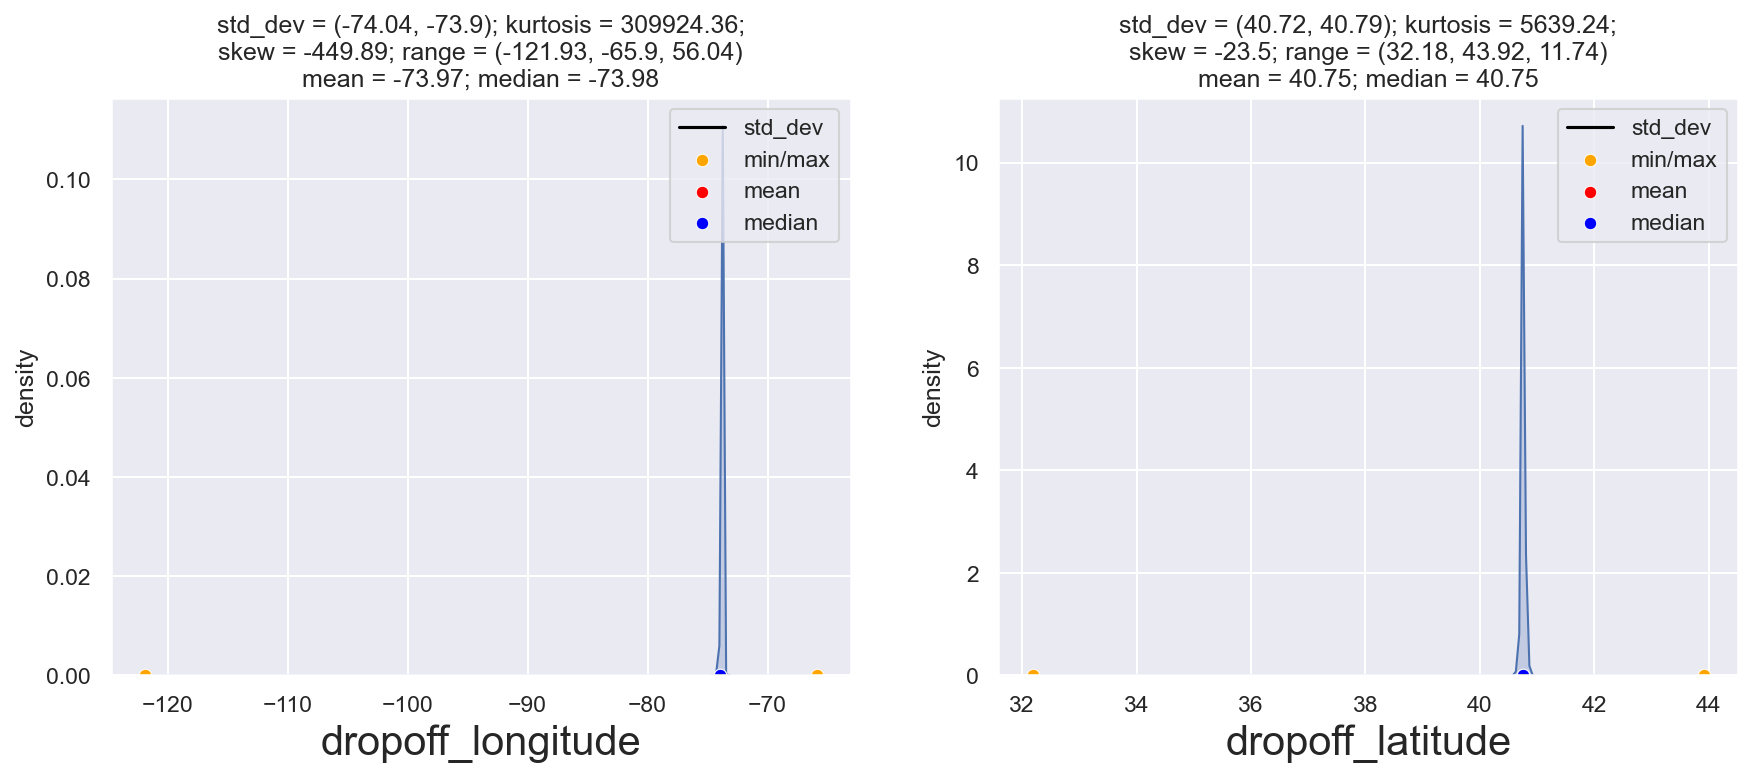

In [23]:
UVA_numeric(data,location_d)

* Dropoff Longitude and Latitude
        Here also same as pickup geolocation
* These outliers must be treating befor other processing

### Univariate analysis for Categorical Features
#### Function for Plotting Categorical Features

In [24]:
# Custom function for easy visualisation of Categorical Variables
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

#### Categorical Features

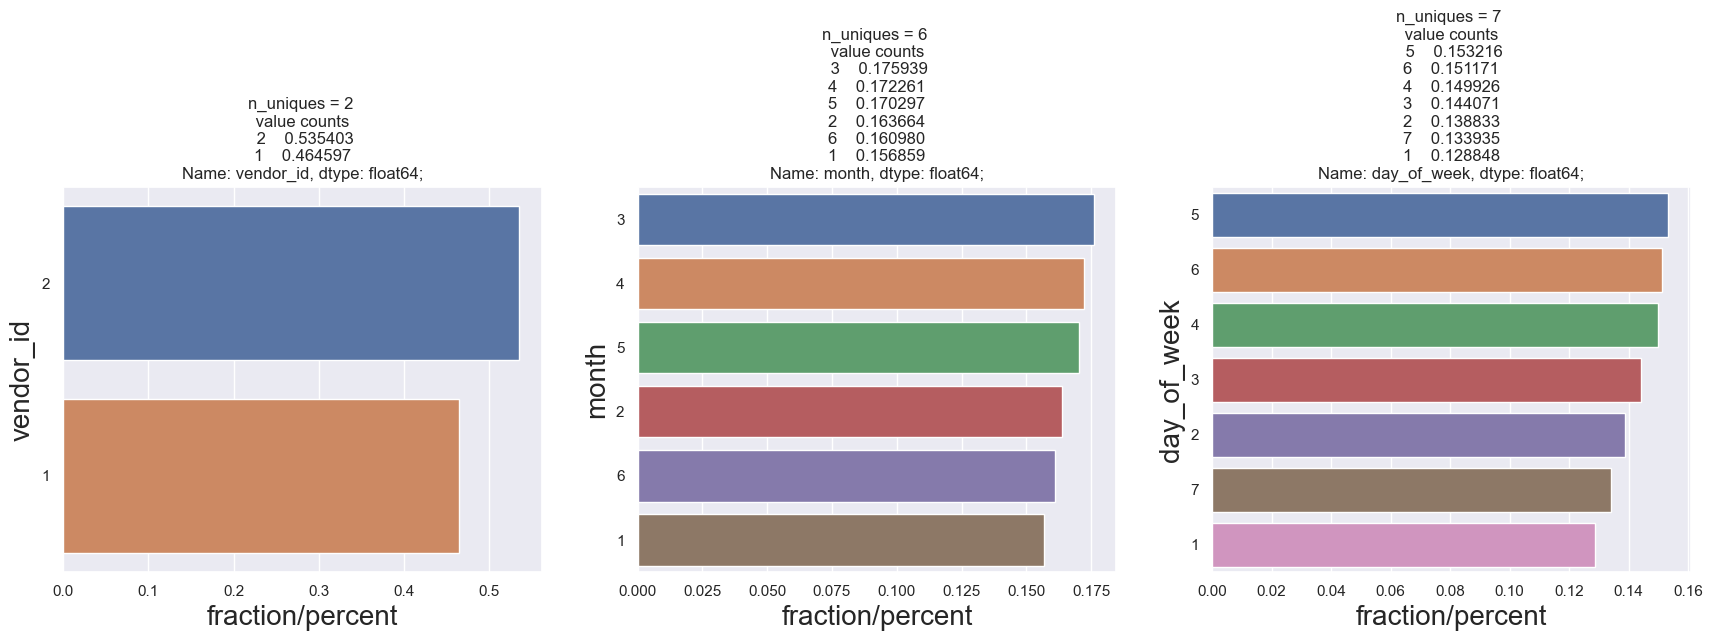

In [25]:
UVA_category(data,category)

* Vendor ID
        There is only two vendors 1 and 2 providing services in NYC
        vendor 2 have 53% of trips while 1 have 46% of the trip
* Month
        Total 6 month of data
        All the months are uniform trips not much differences
* Day of Week
        1 is Monday and 7 is Sunday
        Monday and Sunday pickups are less comparing other days
        The highest trips recorded on Friday and followed by Saturday not much difference

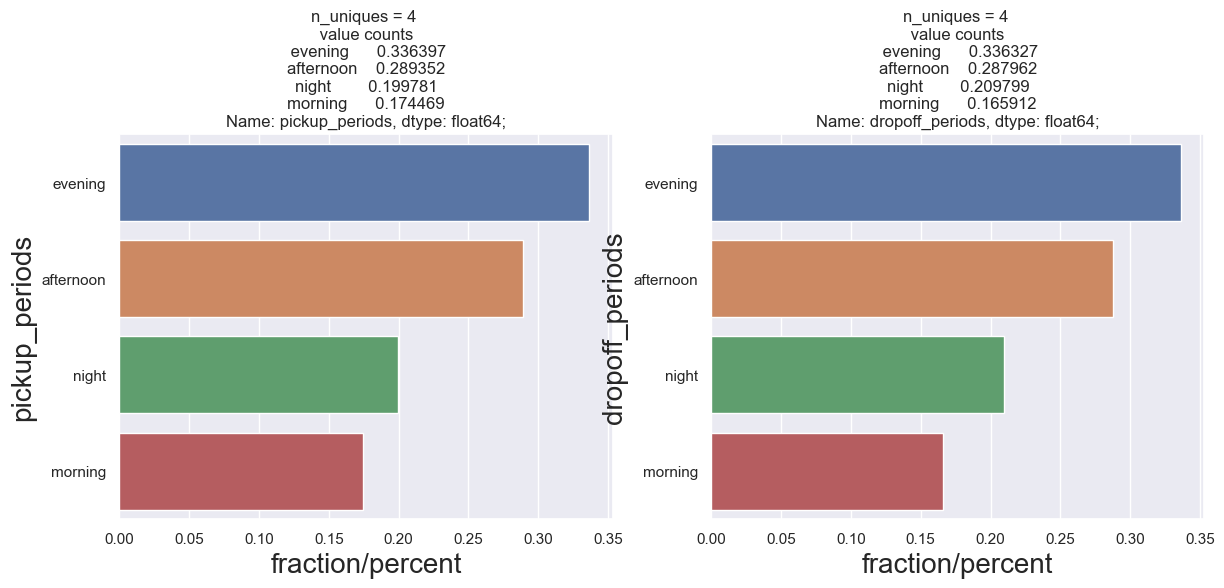

In [26]:
UVA_category(data,periods)

* 4 different Time periods has different informations
* Morning periods has lowest pickups and evening has the highest count

## Function for Boxplot Outliers Analysis

In [27]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

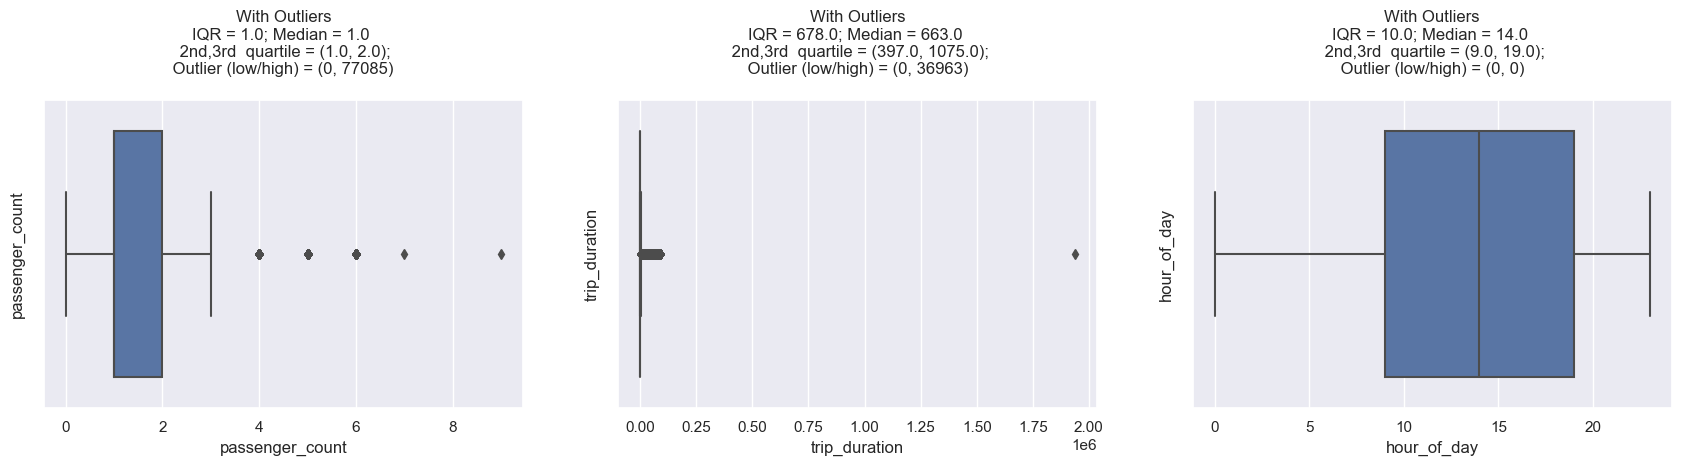

In [28]:
UVA_outlier(data,numeric)

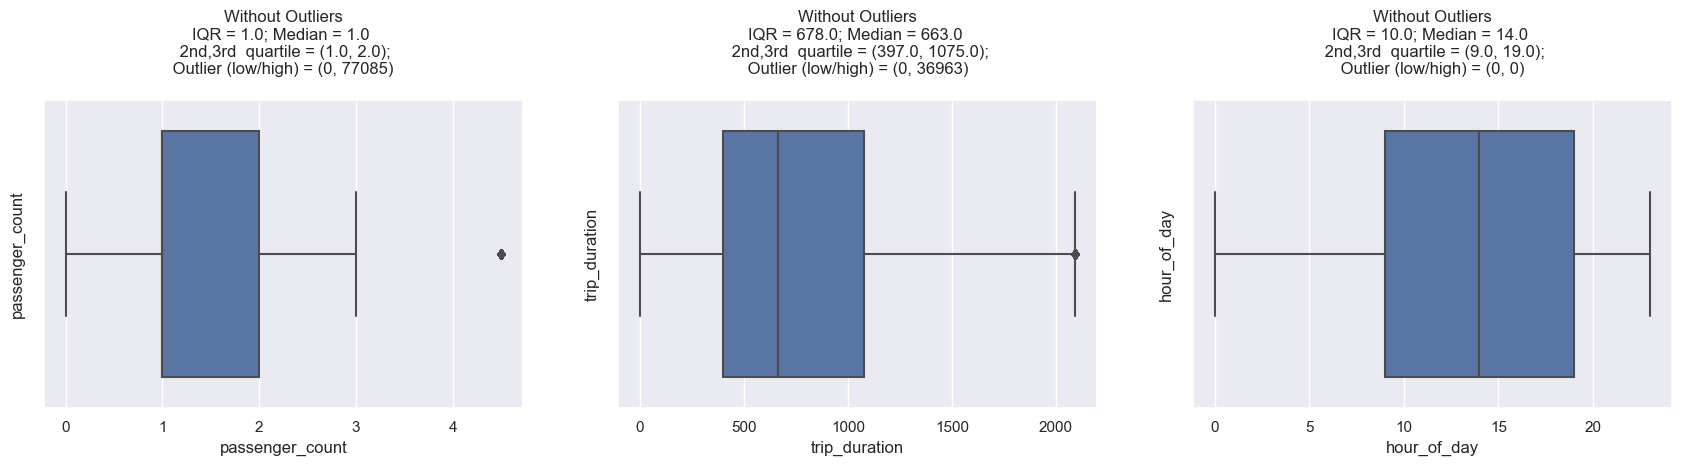

In [29]:
UVA_outlier(data,numeric,include_outlier=False)

* Passenger Count
        The box plot shows the passenger count above 3 is the outliers
        Here zero value need to be removed before using this as a feature
* Trip Duration
        This field is our target field which has very huge outliers
        The box plot not even showing the 2nd and 3rd quartile
* Hour of Day
        Hour of the Day is 0 to 24 pickup time data
        The box plot nothing shows any outliers here
        The 2nd and 3rd quartile is in 9 to 19 hours its a middle of the Day
        

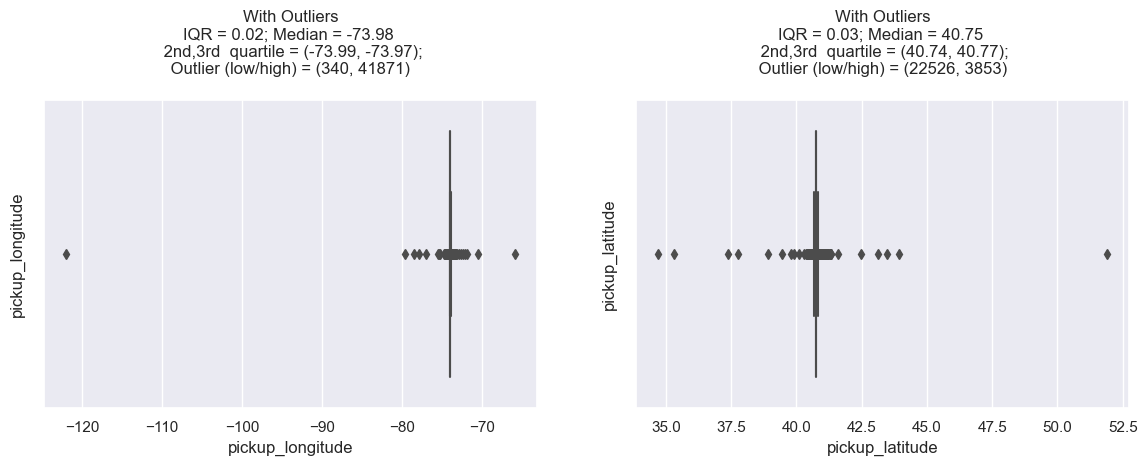

In [30]:
UVA_outlier(data,location_p)

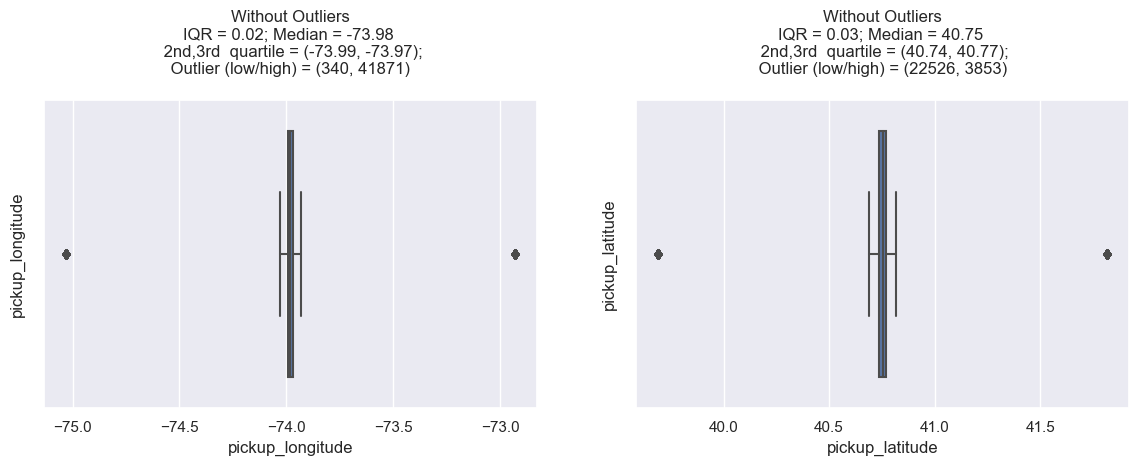

In [31]:
UVA_outlier(data,location_p,include_outlier=False)

* Pickup locations
        The location data 2nd and 3rd quartile in the range of -73.99 to -73.97
        The Latitude location are 40.74 to 40.77
        The location data has some outliers need to be treat.

## Cleaning Dataset
    * Huge number of outliers in the dataset need to treat.

In [32]:
data.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration', 'month',
       'day_of_week', 'hour_of_day', 'hour_bins', 'pickup_periods',
       'dropoff_periods'],
      dtype='object')

### Passenger Count Outliers

In [33]:
# Lets findout how many records above 6
data[data["passenger_count"] >=7]                 

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,month,day_of_week,hour_of_day,hour_bins,pickup_periods,dropoff_periods
149473,2,2016-06-07 10:06:24,2016-06-07 10:06:43,7,-74.173668,40.737274,-74.173660,40.737297,0,19,6,2,10,"(8.0, 12.0]",afternoon,afternoon
629474,2,2016-06-24 08:09:21,2016-06-24 08:18:41,9,-73.710632,40.671581,-73.710632,40.671581,0,560,6,5,8,"(4.0, 8.0]",morning,morning


In [9]:
# Length of the Datapoint less than 1
len(data[data["passenger_count"] <1])

33

* Only 2 datapoint which is more than 6 passengers.
* Total 33 datapoints which has 0 passenger count (Driver entered value may be a human error)
* Lets drop these point from the Dataset

#### Dropping Passenger Counts Outliers

In [10]:
# Dropping passenger count above 6 and below 1
data = data[data["passenger_count"] < 7]
data = data[data["passenger_count"] != 0]

### Store and fwd flag

In [36]:
# Checking values in this feature
data["store_and_fwd_flag"].value_counts()                               # how many Records available for yes

0    725249
1      4038
Name: store_and_fwd_flag, dtype: int64

* This information is not make any big impact in pridiction
* because 1 value is just 4038 out of 7L of data
* Lets Dropit

In [11]:
# Dropping store and fwd flag from the DataFrame
data = data.drop(["store_and_fwd_flag"],axis=1)

### Removing Location Outliers

In [12]:
# Droping same pickup and dropoff geolocation from the dataset
data = data[(data.pickup_longitude != data.dropoff_longitude) | (data.pickup_latitude != data.dropoff_latitude)]

In [13]:
# Fixing boundaries of location details as seen in box plot
data = data.loc[(data.pickup_latitude > 40.6) & (data.pickup_latitude < 40.9)]
data = data.loc[(data.dropoff_latitude > 40.6) & (data.dropoff_latitude < 40.9)]
data = data.loc[(data.dropoff_longitude > -74.05) & (data.dropoff_longitude < -73.7)]
data = data.loc[(data.pickup_longitude > -74.05) & (data.pickup_longitude < -73.7)]

### Distribution Plot for Pickup and Dropoff Locations

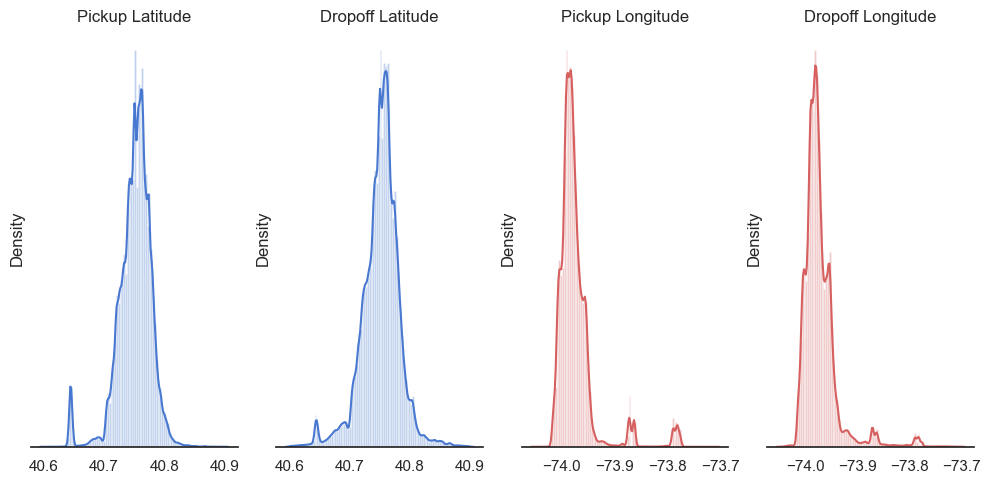

In [40]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1,4,figsize=(10, 5), sharex=False, sharey = False)
sns.despine(left=True)
sns.distplot(data['pickup_latitude'].values, label = 'pickup_latitude',color="b",bins = 100, ax=axes[0])
sns.distplot(data['dropoff_latitude'].values, label = 'dropoff_latitude',color="b",bins =100, ax=axes[1])
sns.distplot(data['pickup_longitude'].values, label = 'pickup_longitude',color="r",bins =100, ax=axes[2])
sns.distplot(data['dropoff_longitude'].values, label = 'dropoff_longitude',color="r",bins =100, ax=axes[3])
axes[0].set_title('Pickup Latitude')
axes[1].set_title('Dropoff Latitude')
axes[2].set_title('Pickup Longitude')
axes[3].set_title('Dropoff Longitude')
plt.setp(axes, yticks=[])
plt.tight_layout()

plt.show()

* Locations are now normally distributed
* Somehow there are some bumps in the plot
* This distribution is good comparing before
* This is the Baseline feature to predict Target

### Scatter Plot for Pickup and Dropoff Locations

Text(0.5, 1.0, 'Dropoff Locations')

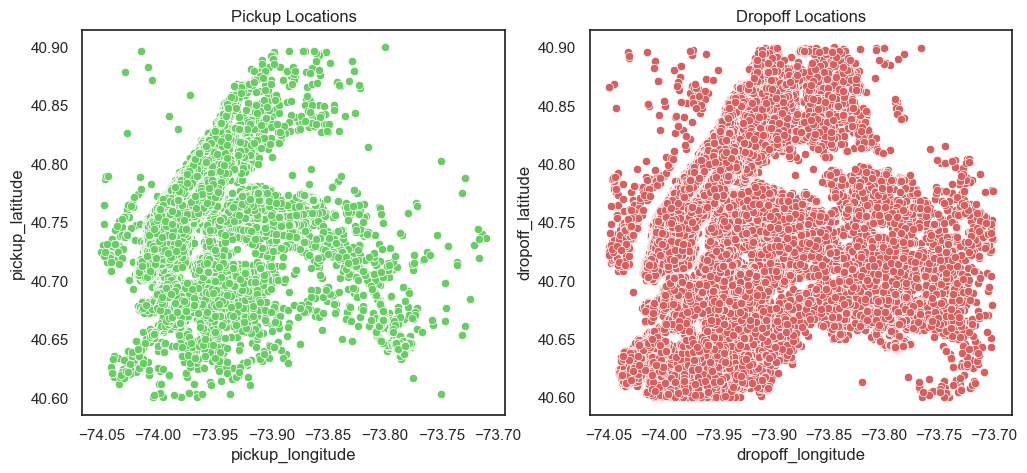

In [41]:
f, axes = plt.subplots(1,2,figsize=(12, 5), sharex=False, sharey = False)
sns.scatterplot(data["pickup_longitude"],data["pickup_latitude"],ax=axes[0],color = 'g')
sns.scatterplot(data["dropoff_longitude"],data["dropoff_latitude"],ax=axes[1],color = 'r')
axes[0].set_title("Pickup Locations")
axes[1].set_title("Dropoff Locations")

* Scatter plot clearly explains. comparing pickup point, dropoff point are differently spreads
* Pickups are frequently in main places
* Dropoffs are differently spreaded

### Trip Duration Outliers

In [14]:
# Converting trip duration into trip duration hour
data['trip_duration_hour']=data['trip_duration']/3600     

* Converting the seconds into an hours by dividing it with 3600
* Its used to understanding the details more clear manner

In [43]:
data.trip_duration_hour.describe()

count    723414.000000
mean          0.263369
std           1.075115
min           0.000278
25%           0.110278
50%           0.183889
75%           0.297222
max         538.815556
Name: trip_duration_hour, dtype: float64

* Maximul value is 538 hours its almost 22 days (huge lier)
* The 75% of data is 0.29 hours only

### Using Quantile Method for Outliers

In [44]:
# Checking the values above 99.5% percentile which is 0.5% of whole data
q = data['trip_duration'].quantile(0.995)
data[data['trip_duration'] >= q].describe()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,hour_of_day,trip_duration_hour
count,3619.000000,3619.000000,3619.000000,3619.000000,3619.000000,3.619000e+03,3619.000000,3619.000000
mean,1.849959,-73.903494,40.713415,-73.936177,40.727608,2.683449e+04,13.463388,7.454025
std,1.440887,0.095040,0.054353,0.081260,0.052727,4.743024e+04,5.092182,13.175067
min,1.000000,-74.016960,40.602863,-74.049683,40.604275,4.097000e+03,0.000000,1.138056
25%,1.000000,-73.987434,40.646568,-73.989071,40.686491,4.425500e+03,10.000000,1.229306
50%,1.000000,-73.963577,40.733780,-73.977493,40.744663,4.970000e+03,15.000000,1.380556
75%,2.000000,-73.789387,40.760441,-73.903770,40.762579,8.083100e+04,17.000000,22.453056
max,6.000000,-73.716507,40.868935,-73.720009,40.897026,1.939736e+06,23.000000,538.815556


* Total 3619 datapoints which is above 99.5% percentile
* Look this distribution the mean value is 7.45 and the deviation is 13.17
* Maximum value of this is 538 hours which is 22 days long. This type of datapoints are affecting our model unconditionally

In [45]:
# Checking the values below 99.9% percentile which is 0.01% of Whole data
q = data["trip_duration"].quantile(0.001)
data[data['trip_duration'] <= q].describe()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,hour_of_day,trip_duration_hour
count,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000
mean,1.328084,-73.931959,40.730488,-73.931952,40.730501,6.234908,12.570866,0.001732
std,0.976719,0.079928,0.051446,0.079864,0.051432,2.804387,6.574817,0.000779
min,1.000000,-74.047920,40.613640,-74.047913,40.613644,1.000000,0.000000,0.000278
25%,1.000000,-73.987274,40.704105,-73.987234,40.703967,4.000000,7.000000,0.001111
50%,1.000000,-73.968040,40.746412,-73.968475,40.746025,6.000000,14.000000,0.001667
75%,1.000000,-73.902876,40.764333,-73.902870,40.764359,9.000000,18.000000,0.002500
max,6.000000,-73.721291,40.871773,-73.721283,40.871521,11.000000,23.000000,0.003056


* The 0.1% data has total 762 Datapoints
* These duration maximum is 11 seconds which is very less
* Lets assume the cab provide service lessthan 11 seconds its ambiquous
* Anyway these datapoints durations are very short so going to drop it

#### Removing Outliers using Quantile Method

In [15]:
# Removed all the value above 99.5%
q = data['trip_duration'].quantile(0.995)
data_new = data[data['trip_duration'] <= q]

# Removed all values below 0.1%.
q = data["trip_duration"].quantile(0.001)
data_new = data_new[data_new['trip_duration'] >= q]

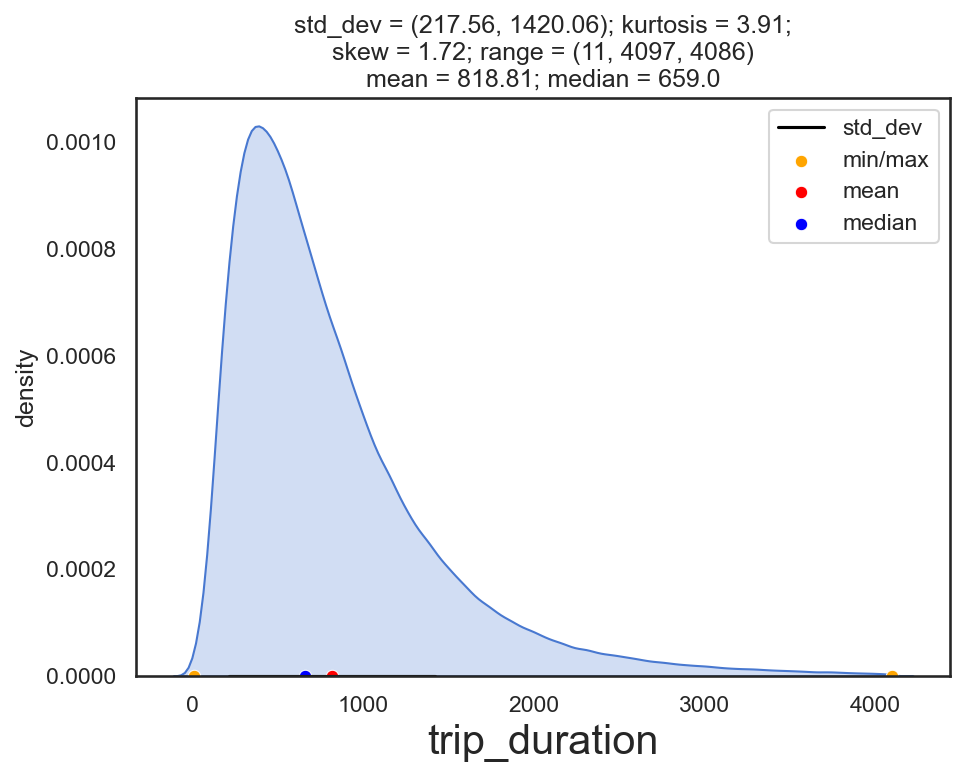

In [47]:
UVA_numeric(data_new,['trip_duration'])

* Now the Distribution looks good its around 11 seconds to 4097 seconds
* The mean and median values has some difference
* Still the std is high not much before anyway the deviation is below mean value
* Positive Right skewed distribution
* The Kurtosis value is good

## Using Eucledian Distance
* Finding distance using haversine formula.
* We use miles here because NYC default distance measurments are in miles only

#### Resetting Index for Iterating Rows

In [16]:
# Resetting index
data_new.reset_index(drop=True,inplace=True)

### Defining Formula for Eucledian Distance (Haversine)

In [17]:
# Importing math funtion to calculate the distance
import math

# Creating empty list
distance = []

# Assigning parameters
pi = math.pi 
cos = math.cos
sin = math.sin
asin = math.asin
p = pow
rad =3958          # This value is used to finding distance in miles, 6371 is finding distance in kilometer.

# Defining haversine formula for finding kilometer
def haversine(lat1, lon1, lat2, lon2):             
    dLat = (lat2 - lat1) * pi / 180
    dLon = (lon2 - lon1) * pi / 180
    lat1 = (lat1) * pi / 180
    lat2 = (lat2) * pi / 180
    a = (p(math.sin(dLat / 2), 2) + p(sin(dLon / 2), 2) * cos(lat1) * cos(lat2));                     
    c = 2 * asin(np.sqrt(a))                 
    miles = rad * c
    distance.append(miles)                            
    return distance

#### Creating loop to Finding Distance

In [18]:
# Assigning location variable 
lat1 = data_new["pickup_latitude"]
lon1 = data_new["pickup_longitude"] 
lat2 = data_new["dropoff_latitude"] 
lon2 = data_new["dropoff_longitude"]

# Creating for loop for inserting all location values to haversine formula
for i in range(len(data_new)):                         
    miles = haversine(lat1[i], lon1[i], lat2[i], lon2[i])

* The above loop function iterates the function formula and return a distance value in miles

In [19]:
# store founded value distance in miles to the Dataframe
data_new["miles"] = miles                                 

In [21]:
# Newly created miles data columns description
data_new['miles'].describe()

count    719093.000000
mean          2.074395
std           2.282321
min           0.000264
25%           0.769665
50%           1.299086
75%           2.376146
max          19.528051
Name: miles, dtype: float64

* The maximum values are 19.5 miles and the minimum is 0.0002 miles
* The 75% of the datapoints are around 2 to 3 miles only
* This explains maximum number of passengers are travelling shortest distances

### Finding Speed using Distance

<AxesSubplot:xlabel='miles_hr'>

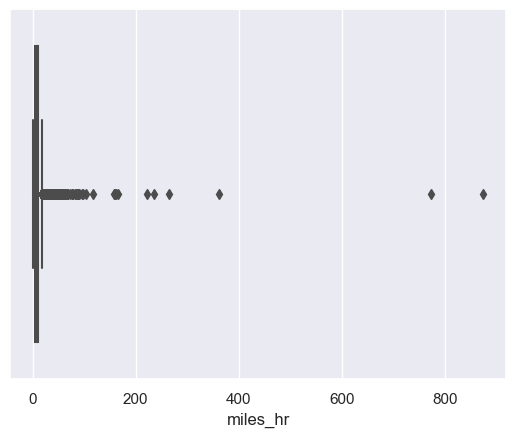

In [22]:
# Creating miles per hour value
data_new['miles_hr'] = data_new['miles']/data_new['trip_duration_hour']

# Boxplot to see the outliers
sns.boxplot(data_new['miles_hr'])

* The Average miles per hour in new york city is 30 mph only
* The boxplot shows several outliers in speed

In [54]:
# Description
data_new['miles_hr'].describe()

count    719093.000000
mean          8.946098
std           4.988788
min           0.001272
25%           5.699906
50%           7.954616
75%          11.072735
max         874.788722
Name: miles_hr, dtype: float64

* The maximum values shows 874 mph vehicle driving speed, its like flying speed 
* The 75% of this data has 11 mph so this value must be outlier
* Let we check the speed above 50 how many datapoints are there

#### Finding Outliers using Speed

In [55]:
# Checking how many datapoints are above 50 mph
len(data_new[data_new['miles_hr'] > 50])

52

* There are total 52 datapoints which higher than 50/mph
* Lets drop these datapoints

In [23]:
# Removing datapoints greater than 50 miles per hour
data_new = data_new[data_new['miles_hr'] <= 50]

In [57]:
# Checking lessthan 1 mph in dataset
len(data_new[data_new['miles_hr'] < 1])

3258

* There are more than 3000 datapoints which has less than 1 mph in dataset
* Average human walking speed is 2 mph, these points are lessthan 1 mph
* I am going to drop lessthan 1 mph datapoints from this dataset

In [24]:
# Removing datapoints lessthan 1 miles per hour
data_new = data_new[data_new['miles_hr'] > 1]

#### Scatterplot for Miles and Trip Duration with and without log

Text(0, 0.5, 'Log Duration')

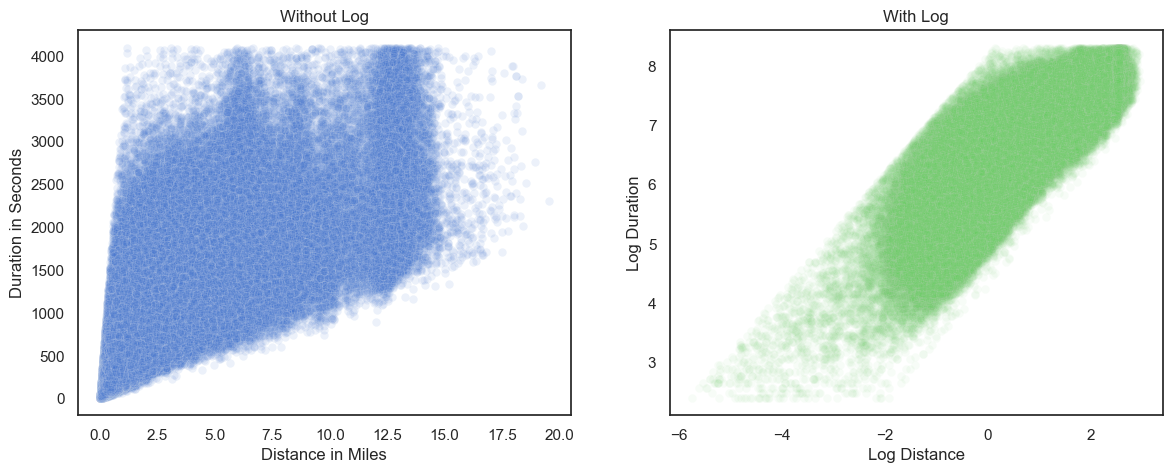

In [59]:
# Assigning plotting datas to the variables
x = data_new['miles']
y = data_new['trip_duration']
yl = np.log(y)
xl = np.log(x)

# Ploting scatterplot
f, axes = plt.subplots(1,2,figsize=(14, 5), sharex=False, sharey = False)
sns.scatterplot(x,y,ax=axes[0], alpha = 0.1)
sns.scatterplot(xl,yl,ax=axes[1],color = 'g',alpha=0.05)
axes[0].set_title("Without Log")
axes[0].set_xlabel("Distance in Miles")
axes[0].set_ylabel("Duration in Seconds")
axes[1].set_title("With Log")
axes[1].set_xlabel("Log Distance")
axes[1].set_ylabel("Log Duration")

* Miles and trip duration scatter plot
* This log transformation plot for miles and trip duration is clearly shows linear relationships

### Cluster Analysis for Pickup Locations
* Pickup location values we used to split by clusters which is give us more usefull insights by area in NYC

In [25]:
# Importing library
from sklearn.cluster import KMeans

In [26]:
# Slicing location data into the variable x_p
x_p = data_new.iloc[:,4:6]
x_p.head()

,pickup_longitude,pickup_latitude
0,-73.953918,40.778873
1,-73.988312,40.731743
2,-73.997314,40.721458
3,-73.961670,40.759720
4,-74.017120,40.708469


* I use only pickup location details.

In [27]:
# Standardize location values to find best value of KMean
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_p = ss.fit_transform(x_p)

#### Finding Best KMeans Values using Loops

In [28]:
# Creating a loop for finding KMean value
wc = []

# loop iterate range 1 to 10 and return inertia value
for i in range(1,10):
    kmean = KMeans(i)
    kmean.fit(x_p)
    wcss_iter = kmean.inertia_
    wc.append(wcss_iter)

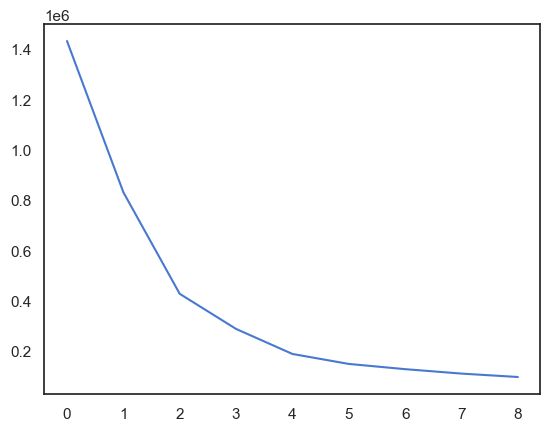

In [64]:
# Plotting the Kmean inertia value to find optimal value of KMean
plt.plot(wc)

* Looking for the lowest inertia value for clustering,
* The Elbow curve is in 4 to 5 is best suitable value
* I choose KMean is 4 for Clusters

#### Fitting KMeans and Prediction

In [29]:
# Assigning Kmean value to 4 and predict clusters
kmean = KMeans(4)
data_cluster = kmean.fit_predict(x_p)

#### Storing Founded Cluster to the DataFrame

In [30]:
# Creating new column cluster and adding cluster values to the column
data_cluster_new = data_new.copy()
data_cluster_new["cluster"] = data_cluster
data_cluster_new.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,month,day_of_week,hour_of_day,hour_bins,pickup_periods,dropoff_periods,trip_duration_hour,miles,miles_hr,cluster
0,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,400,2,1,16,"(12.0, 16.0]",evening,evening,0.111111,0.744927,6.704342,2
1,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,1100,3,5,23,"(20.0, 24.0]",night,night,0.305556,2.565221,8.395268,0
2,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,1635,2,7,17,"(16.0, 20.0]",evening,evening,0.454167,4.504549,9.918272,0
3,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,1141,1,2,9,"(8.0, 12.0]",morning,afternoon,0.316944,1.466838,4.628060,2
4,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,848,2,3,6,"(4.0, 8.0]",morning,morning,0.235556,2.689113,11.416045,0


* The clusters we were created was stored in the dataframe by th following values 0,1,2,3

#### Scatter Plot with Clusters

Text(0, 0.5, 'pickup latitude')

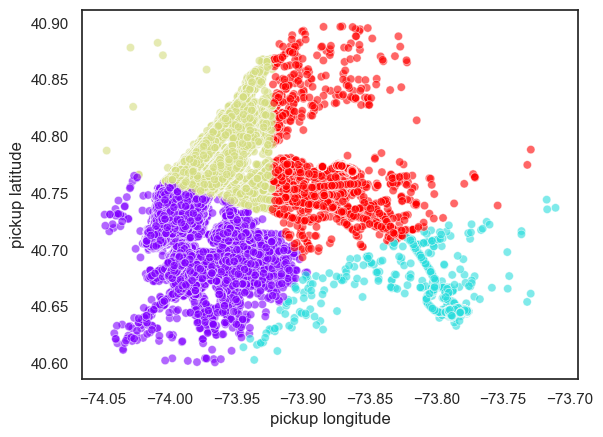

In [67]:
# Scatterplot to view how clustering performs
sns.scatterplot(x=data_cluster_new["pickup_longitude"],y=data_cluster_new["pickup_latitude"],c=data_cluster_new["cluster"],cmap="rainbow",alpha=0.6)
plt.xlabel("pickup longitude")
plt.ylabel("pickup latitude")

* The clusters divided locations to 4 parts as shown in the figure

### Bivariate Analysis

In [68]:
# Checking columns
data_cluster_new.dtypes

vendor_id                   category
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
trip_duration                  int64
month                       category
day_of_week                 category
hour_of_day                    int64
hour_bins                   category
pickup_periods                object
dropoff_periods               object
trip_duration_hour           float64
miles                        float64
miles_hr                     float64
cluster                        int32
dtype: object

* I only take pickup periods as a feature.
* Pickup periods details are available when trips starts.
* Dropoff periods only available when trips ends, So we don't need this feature to predict trip duration

### Using Features
* I am not using all of this to build model
* It will make the model complex and Leads to multicollinearity

In [31]:
# converting categories
data_cluster_new['pickup_periods'] = data_cluster_new['pickup_periods'].astype('category')
data_cluster_new['cluster'] = data_cluster_new['cluster'].astype('category')
data_cluster_new['month'] = data_cluster_new['month'].astype('category')
data_cluster_new['passenger_count'] = data_cluster_new['passenger_count'].astype('category')
data_cluster_new['vendor_id'] = data_cluster_new['vendor_id'].astype('category')
data_cluster_new['day_of_week'] = data_cluster_new['day_of_week'].astype('category')

In [32]:
# Assigning the important features to df and using pandas get dummy variables in the same columns
df = data_cluster_new.loc[:,['miles', 'passenger_count', 'month', 'day_of_week',
                            'hour_of_day', 'pickup_periods', 'cluster', 'trip_duration','vendor_id']]
df = pd.get_dummies(df,columns=['pickup_periods','day_of_week','cluster'])

* I removed miles_hr columns which can lead multicollinearity
* I removed locations columns because we have find miles using locations
* I removed pickup and dropoff pandas date columns which is not need because we extract day of weeks, months of year and time of day to different columns

#### Pearson Correlation

In [71]:
c = df.corr().abs()
s = c.unstack()
so = s.sort_values(kind='quicksort',ascending=False)
so = pd.DataFrame(so,columns=['Pearson Correlation'])

In [72]:
so[so['Pearson Correlation'] < 1].head(20)

,,Pearson Correlation
cluster_2,cluster_0,0.903177
cluster_0,cluster_2,0.903177
miles,trip_duration,0.768631
trip_duration,miles,0.768631
hour_of_day,pickup_periods_evening,0.557466
pickup_periods_evening,hour_of_day,0.557466
cluster_1,miles,0.538042
miles,cluster_1,0.538042
pickup_periods_evening,pickup_periods_afternoon,0.454189
pickup_periods_afternoon,pickup_periods_evening,0.454189


### Heat Maps Pearson Correlation

In [73]:
# Show correlation table
def correlation_table(df):
    colormap = plt.cm.viridis
    plt.figure(figsize=(20,20))
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    sns.heatmap(df.corr().round(2),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True);

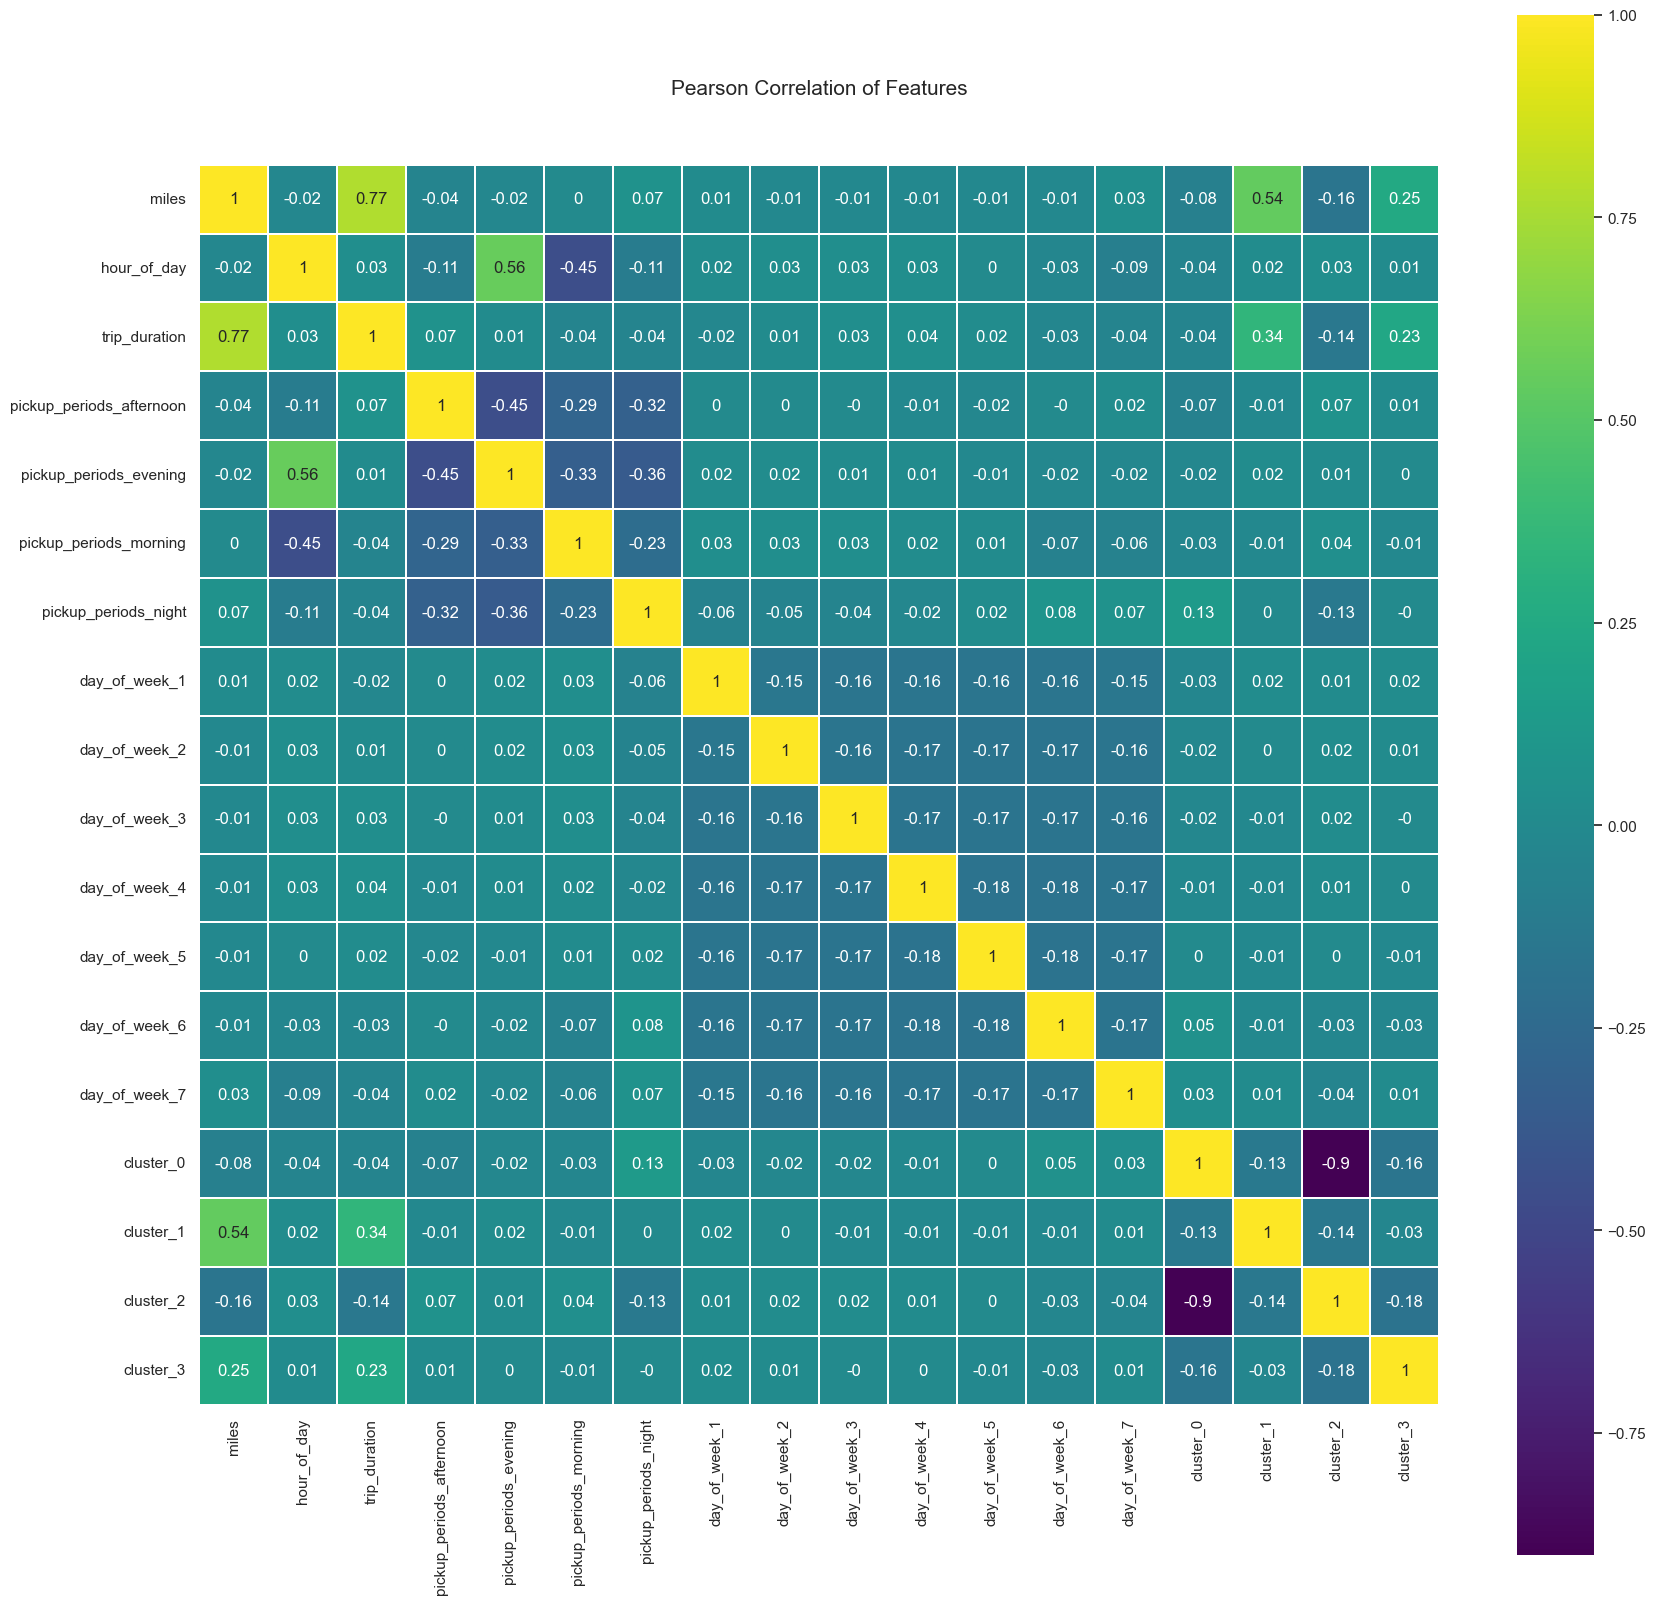

In [74]:
correlation_table(df)

* Pearson correlation table explains the trip duration and miles features having high correlations
* Clusters we created before having similar correlations between trip duration
* similarly weeks and moths having some negatively correlated with each others
* Hour bins and periods has high correlation we need to remove any one of them
* Vendor id has no correlation with trip duration

### Multivariate Analysis

Here I am using pivot table to comply with the objective of identifying the passenger count, weekdays and other feature analysis

In [75]:
data_cluster_new.pivot_table('trip_duration',['cluster'],'pickup_periods',aggfunc='mean').round(3)

pickup_periods,afternoon,evening,morning,night
cluster,,,,
0,861.362,796.569,717.766,767.864
1,2507.954,2375.432,2185.976,1727.267
2,783.942,727.013,713.604,697.026
3,1870.790,1655.728,1571.155,1079.045


* As we can find out the maximum number of mean value or trips duration in cluster 2 and followed by 3
* Night time travelling is comparitively less
* Afternoon and evening time trip duration mean is high

In [76]:
data_cluster_new.pivot_table('miles',['cluster'],'passenger_count',aggfunc='sum').round(3)

passenger_count,1,2,3,4,5,6
cluster,,,,,,
0,416145.866,90336.327,25185.967,11878.654,31449.787,19247.648
1,101576.700,27459.503,6618.937,3539.971,8336.447,5106.972
2,442888.028,91774.571,25671.095,12238.584,33685.021,20776.330
3,81956.897,17270.406,4610.708,2100.273,7471.588,3824.584


* The cluster 0 has high number of miles travelled
* Cluster 1 has second highest miles travelled
* According to the pivot table passenger 1 and followed by 2 have high in distance travelled

In [77]:
data_cluster_new.pivot_table('trip_duration',['cluster'],'day_of_week',aggfunc='mean').round(3)

day_of_week,1,2,3,4,5,6,7
cluster,,,,,,,
0,739.618,797.054,834.222,845.123,827.315,778.969,723.013
1,2196.644,2202.802,2310.657,2393.148,2344.948,2153.983,2160.735
2,696.835,760.491,779.241,790.965,763.147,691.658,659.617
3,1585.706,1712.970,1751.531,1779.757,1680.278,1216.192,1319.069


* According to the pivot table trip duration mean is high in cluster 2 and 3 passenger
* The cluster 2 and 3 has busy areas or may be road not good so this area takes trip duration timing high

In [78]:
data_cluster_new.pivot_table('miles',['cluster'],'day_of_week',aggfunc='sum').round(3)

day_of_week,1,2,3,4,5,6,7
cluster,,,,,,,
0,70766.795,74172.192,79384.327,85585.842,90938.441,101133.493,92263.159
1,26144.752,21192.705,19269.614,20034.881,20271.479,19951.422,25773.676
2,81837.287,87275.857,91859.575,96004.463,96516.672,90599.523,82940.252
3,20002.997,18293.662,17187.450,18104.567,16621.130,9749.430,17275.220


* According to the pivot table long distance travelling by cluster 0 and 1 passengers

In [79]:
miles = pd.cut(data_cluster_new['miles'],[0,5,10,15,20])
data_cluster_new.pivot_table('trip_duration',['pickup_periods'],miles,aggfunc='mean').round(3)

miles,"(0, 5]","(5, 10]","(10, 15]","(15, 20]"
pickup_periods,,,,
afternoon,762.328,1997.983,2809.002,2764.183
evening,712.320,1883.492,2686.972,2660.031
morning,655.019,1681.007,2246.302,2655.825
night,665.128,1546.669,1979.577,2054.919


* The mean value of trip_duration linearly increases with miles

In [80]:
data_cluster_new.pivot_table('trip_duration',[miles],'hour_bins',aggfunc='mean').round(3)

hour_bins,"(-0.1, 4.0]","(4.0, 8.0]","(8.0, 12.0]","(12.0, 16.0]","(16.0, 20.0]","(20.0, 24.0]"
miles,,,,,,
"(0, 5]",628.836,624.172,755.397,761.871,715.125,686.401
"(5, 10]",1461.570,1673.151,1934.256,2106.601,1891.819,1612.055
"(10, 15]",1781.281,2273.072,2547.850,2988.925,2704.112,2142.773
"(15, 20]",1941.667,2650.720,2715.686,2888.442,2779.950,2199.663


* Here trip duration mean time 12 to 16 hours has high due to the traffic conjunctions in all clusters
* The early morning time 0 to 4 hours usually trip duration is very less comparing others
* The mean trip duration at 20 to 24 hours also less

### Features Selection
#### Dataset Columns

In [81]:
# Checking the Features names
df.columns

Index(['miles', 'passenger_count', 'month', 'hour_of_day', 'trip_duration',
       'vendor_id', 'pickup_periods_afternoon', 'pickup_periods_evening',
       'pickup_periods_morning', 'pickup_periods_night', 'day_of_week_1',
       'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5',
       'day_of_week_6', 'day_of_week_7', 'cluster_0', 'cluster_1', 'cluster_2',
       'cluster_3'],
      dtype='object')

#### Feature and Target set to Different Variables

In [33]:
# Assigning Feature and target to the x and y variables
y = df['trip_duration']
x = df.drop(['trip_duration',],axis=1)

In [34]:
# Import f_regression from sklearn
from sklearn.feature_selection import f_regression
print(f_regression(x,y))

(array([1.03340974e+06, 1.41924644e+02, 2.34771199e+03, 7.98805980e+02,
       3.06023393e+01, 3.07425423e+03, 2.38147048e+01, 1.31748352e+03,
       1.16220691e+03, 2.55247086e+02, 1.00462387e+02, 5.32135595e+02,
       1.02022584e+03, 2.48322934e+02, 8.32506608e+02, 1.44125212e+03,
       1.02634006e+03, 9.30801298e+04, 1.36457346e+04, 4.00824451e+04]), array([0.00000000e+000, 1.01731668e-032, 0.00000000e+000, 1.22637167e-175,
       3.16821939e-008, 0.00000000e+000, 1.06091793e-006, 3.28998728e-288,
       1.59925114e-254, 1.90779439e-057, 1.21101316e-023, 1.07012088e-117,
       1.03749091e-223, 6.15866622e-056, 5.88860325e-183, 4.71460314e-315,
       4.88540394e-225, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000]))


* The first array is F scores for individual features
* The second array is Pvalue of all the features
* Lets create the dataframe to verify the pvalue is < 0.05 is significant else not significant

#### Creating DataFrame for Storing F-Regression Values

In [35]:
# Creating Dataframe to store feature values
fscore = f_regression(x,y)[0]
pvalue = f_regression(x,y)[1]
values = pd.DataFrame({
    'Features' : x.columns,
    'Pvalues' : pvalue.round(3),
    'FScore' : fscore.round(3)
})
values = values.sort_values(by='FScore',ascending=False)
values

,Features,Pvalues,FScore
0,miles,0.0,1033409.736
17,cluster_1,0.0,93080.130
19,cluster_3,0.0,40082.445
18,cluster_2,0.0,13645.735
5,pickup_periods_afternoon,0.0,3074.254
2,month,0.0,2347.712
15,day_of_week_7,0.0,1441.252
7,pickup_periods_morning,0.0,1317.484
8,pickup_periods_night,0.0,1162.207
16,cluster_0,0.0,1026.340


* As we see in this table Pvalue for all features is significant except some features
* Miles feature have high F score followed by other features
* Lets move to the predictive modeling with these features

#### Filtering the Score below 500

In [36]:
# Storing Features pvalues below 0.05 alpha is a significant feature
values = values[(values['Pvalues'] <0.05)&(values['FScore']>500)]


# Storing the Features name into the cols variable
cols = values.Features

In [37]:
values

,Features,Pvalues,FScore
0,miles,0.0,1033409.736
17,cluster_1,0.0,93080.130
19,cluster_3,0.0,40082.445
18,cluster_2,0.0,13645.735
5,pickup_periods_afternoon,0.0,3074.254
2,month,0.0,2347.712
15,day_of_week_7,0.0,1441.252
7,pickup_periods_morning,0.0,1317.484
8,pickup_periods_night,0.0,1162.207
16,cluster_0,0.0,1026.340


#### Storing Good Features and Target to the New Dataframe

In [38]:
data_f = df[cols]
data_f['trip_duration'] = df['trip_duration']

## Predictive Modeling

## Selecting Evaluation Metric
### Root Mean Square Error
* RMSE explaination is Root Mean Square Error, which is the square root of value obtained from Mean Square Error function.
* It is extremely helpful to have a single number to judge a model's performance, whether it be during training, cross-validation, or monitoring after deployment. Root mean square error is one of the most widely used measures for this Regression models.
* Using RMSE, we can easily plot a difference between the estimated and actual values of a parameter of the model.
                              ( Formula for RMSE )
                        Root of (Predicted - Actual)^2 / N

### Creating Benchmark Model

In [39]:
# Importing shuffle from sklearn
from sklearn.utils import shuffle

# Suffling the Dataset
data_bm = shuffle(data_f, random_state=88)

# Divide dataset into 4 parts
div = int(data_bm.shape[0]/4)

# 3 parts to train set and 1 part to test set
train = data_bm.loc[:3*div,:]
test = data_bm.loc[div*3:,:]

In [40]:
train.shape,test.shape

((564886, 15), (150898, 15))

* I first divide the shape of data into 4 parts and get the value
* I create train and test variable which holds 3:1 proportion
* I will check the mean value of train data and check the errors what we have in test data

### Simple Mean Error Calculations

In [41]:
# Importing necessary librarys
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

* Importing metrics in sklearn library to calculate errors

In [42]:
# finding mean value of trip duration
test['simple_mean'] = train['trip_duration'].mean()

# Calculating errors
simple_mean_error_mae = mae(test['trip_duration'],test['simple_mean'])
simple_mean_error_mse = mse(test['trip_duration'],test['simple_mean'])
simple_mean_error_rmse = np.sqrt(simple_mean_error_mse)

# Printing errors
print("MAE  : ",simple_mean_error_mae)
print("MSE  : ",simple_mean_error_mse)
print("RMSE : ",simple_mean_error_rmse)

MAE  :  443.43873545018363
MSE  :  357598.64346003125
RMSE :  597.9955212708797


* All the metrics shown different result. 
* Looking at the three evaluation metrics, MSE showing high value but MAE and RMSE showing values little different
* MAE Error is general error simply subtract predicted and actual with number of datapoints n

## Train Test Split

In [43]:
# Importing Train Test Split from sklearn
from sklearn.model_selection import train_test_split as tts

* Importing train_test_split, sklearn library its helps to split data within our conditions

#### Assigning Input Features and Targets to the Variable

In [44]:
# Assigning Input and Target variables
inpuT = data_f.drop(["trip_duration"],axis=1)
target = data_f[['trip_duration']]

* Creating Predicters and Target variables

#### Shape of Features and Targets

In [45]:
# Checking shape
inpuT.shape, target.shape

((715783, 14), (715783, 1))

* Inputs and Target shapes are above

In [46]:
# Using train test split library to splitting the data into two half
xtrain,xtest,ytrain,ytest = tts(inpuT,target,test_size=0.5,random_state=299)

# First half is for Training and This half is divided into two half one for validation one for test
xval,xtest,yval,ytest  = tts(xtest,ytest,test_size=0.5,random_state=299)

# Printing Data shapes
print("Train Data Shape       : " ,xtrain.shape,ytrain.shape)
print("Validation Data Shape  : " ,xval.shape,yval.shape)
print("Test Data Shape        : " ,xtest.shape,ytest.shape)

Train Data Shape       :  (357891, 14) (357891, 1)
Validation Data Shape  :  (178946, 14) (178946, 1)
Test Data Shape        :  (178946, 14) (178946, 1)


* I split the data into 3 parts
        * Training part is 50%
        * Validation part is 25%
        * Testing part is 25%

### Function for Calculating Testing and Validation Errors of Models

In [47]:
# Defining a function for fit and training and testing errors
def model_test(model,xtrain,ytrain,xtest,ytest):
    
    # Fit the data to the model
    model.fit(xtrain,ytrain)
    
    # Predicting the training and calculating RMSE
    pred_tr = model.predict(xtrain)
    RMSE_tr = np.sqrt(mse(pred_tr,ytrain))
    
    # Predicting the test and calculating RMSE
    pred_te = model.predict(xtest)
    RMSE_te = np.sqrt(mse(pred_te,ytest))
    
    # Print the Errors
    print('Training Errors : ', RMSE_tr)
    print('Testing Errors : ', RMSE_te)
    
    # Returns Training and Testing Errors
    return RMSE_tr,RMSE_te

# Defining a function for Cross validation
def model_cv(model,xtrain,ytrain,CV):
    
    # Fit the data to the model
    model.fit(xtrain,ytrain)
    
    # Predicting the training and calculating RMSE
    pred_tr = model.predict(xtrain)
    RMSE_tr = np.sqrt(mse(pred_tr,ytrain))
    
    # Cross validating model 
    cv_score = cvs(model,xtrain,ytrain,cv=CV,scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    # Printing the Errors and Cross validation details
    print('Training Errors : ', RMSE_tr)
    print ("CV Score : Mean = {} | Std = {} | Min = {} | Max = {}".format(np.mean(cv_score),
                                                                          np.std(cv_score),
                                                                          np.min(cv_score),
                                                                          np.max(cv_score)))
    # Returns the Training Errors and mean and std of cross validation
    return RMSE_tr,cv_score.mean(),cv_score.std()

## KNN Regression

In [48]:
# Importing Relevant Libraries
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.model_selection import cross_val_score as cvs

# Importing GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV as GSCV

* Here I used only a 50,000 Datapoints for Training and 10,000 Datapoints for Validation
* KNN is a basically a lazy algorithem so that for searching best N value to reduce data to speedup the process

#### KNN Fit and Predict Train and Validation Sets

In [98]:
# Assigning 50,000 datapoints input to predict validation set
x = xtrain[:50000]
y = ytrain[:50000]
xv = xval[:10000]
yv=yval[:10000]

# Setting N value to train and predict data using function
knn = KNN(n_neighbors=1)
model_test(knn,x,y,xv,yv)

Training Errors :  0.0
Testing Errors :  428.72553551194034


(0.0, 428.72553551194034)

* The KNN regression n_neighbors = 1 predicted training error is 0 and Validation error is 428
* When Finding the right n_neighbors value to predict more accurate result

# Training and Validating with Different N values
* Here I use N in range 1 to 70 the step size is 5 for finding 14 different results

In [99]:
# Creating empty list to store finding errors
train_error = []
test_error=[]

# Set the N value
N = range(1,70,5)

# Creating a loop for finding optimal N values
for i in N :
    knn = KNN(n_neighbors=i)
    print("n_neighbor = ",i)
    train,test = model_test(knn,x,y,xv,yv)
    
    # Appending the errors in to the list
    train_error.append(train)
    test_error.append(test)

n_neighbor =  1
Training Errors :  0.0
Testing Errors :  428.72553551194034
n_neighbor =  6
Training Errors :  281.1003895635468
Testing Errors :  336.08813482808677
n_neighbor =  11
Training Errors :  296.83193492096774
Testing Errors :  329.1172816567431
n_neighbor =  16
Training Errors :  304.61037746526506
Testing Errors :  327.4966481394552
n_neighbor =  21
Training Errors :  309.0062247628304
Testing Errors :  325.77111533954195
n_neighbor =  26
Training Errors :  310.9520722173155
Testing Errors :  325.4339023237389
n_neighbor =  31
Training Errors :  312.4803535204982
Testing Errors :  324.744648129674
n_neighbor =  36
Training Errors :  313.92657079072796
Testing Errors :  324.2506793537102
n_neighbor =  41
Training Errors :  315.5057505274592
Testing Errors :  324.5835419928122
n_neighbor =  46
Training Errors :  316.60748390739604
Testing Errors :  324.42715762266124
n_neighbor =  51
Training Errors :  317.670992783695
Testing Errors :  324.8182272278549
n_neighbor =  56
Tra

* The Train error and Validation error are same in some point of n_neighbors but it leads to overfitting
* The Validation set error rapid reducing from 1 to 25 and after that it not reduced after 25 validation errors increasing
* Lets plot the both errors in a plot and findout the elbow curve to decide what value is better fit in this situation

#### Plotting the Testing and Validation Errors

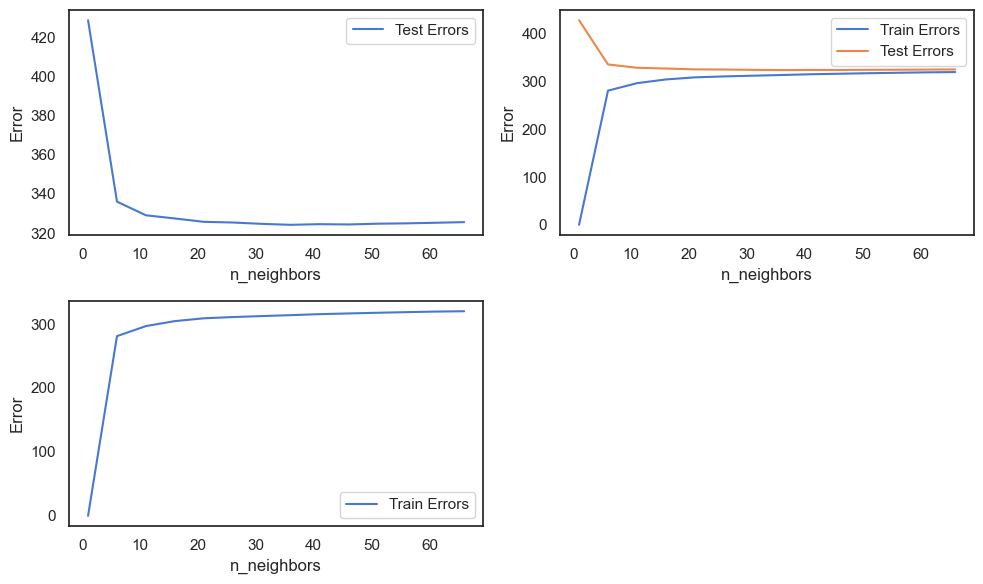

In [100]:
# create a figure with Three subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# plot test error
axs[0,0].plot(N, test_error, label='Test Errors')
axs[0,0].set_xlabel('n_neighbors')
axs[0,0].set_ylabel('Error')
axs[0,0].legend()

# plot train error
axs[1,0].plot(N, train_error, label='Train Errors')
axs[1,0].set_xlabel('n_neighbors')
axs[1,0].set_ylabel('Error')
axs[1,0].legend()

# plot train and test errors
axs[0,1].plot(N, train_error, label='Train Errors')
axs[0,1].plot(N, test_error, label='Test Errors')
axs[0,1].set_xlabel('n_neighbors')
axs[0,1].set_ylabel('Error')
axs[0,1].legend()

plt.delaxes(axs[1,1])

# adjust layout and padding
fig.tight_layout()

# show the plot
plt.show()


* The Elbow curve of Validation Error showing us the N value is 27 because after 27 the error reducing rate is increaing
* The Train Error is continuously increasing.
* So we make cross validation set to verify this n_neighbors value is good to predict target

### Finding Best n_neighbors value of KNN using Cross Validation

* This will returns the Mean and Std Deviation Value of N

In [101]:
# Creating empty list for storing error values
train_error = []
cv_mean = []
cv_std = []

# Set N value
N = range(10,40,2)

# Creating a loop to iterate n_neighbors and return errors
for i in N :
    print("n_neighbor = ",i)
    knn = KNN(n_neighbors=i)
    train,mean,std = model_cv(knn,x,y,5)
    
    # appending values to the empty list
    train_error.append(train)
    cv_mean.append(mean)
    cv_std.append(std)

n_neighbor =  10
Training Errors :  294.60402137106007
CV Score : Mean = 329.2384413823085 | Std = 4.295697236558896 | Min = 324.0309513657607 | Max = 336.2547879971376
n_neighbor =  12
Training Errors :  298.69473558416536
CV Score : Mean = 328.00410716409 | Std = 4.110129916756798 | Min = 322.7338979684605 | Max = 335.033360335206
n_neighbor =  14
Training Errors :  302.1212657932073
CV Score : Mean = 327.17807836490863 | Std = 4.076394252125142 | Min = 322.2340700262998 | Max = 334.01465515782996
n_neighbor =  16
Training Errors :  304.61037746526506
CV Score : Mean = 326.4152323527052 | Std = 3.9819702945061635 | Min = 321.2864872773694 | Max = 333.02274957599553
n_neighbor =  18
Training Errors :  306.67388720102605
CV Score : Mean = 325.7066606001954 | Std = 3.933879276611462 | Min = 320.82166856668766 | Max = 332.49441536245723
n_neighbor =  20
Training Errors :  308.3558713114605
CV Score : Mean = 325.27960307736817 | Std = 3.7501187087636048 | Min = 320.74415230795717 | Max = 

* It gives us Training Errors and Cross Validation errors Mean and Standard deviation

#### Plotting Cross Validation  Mean and Standard Deviation 

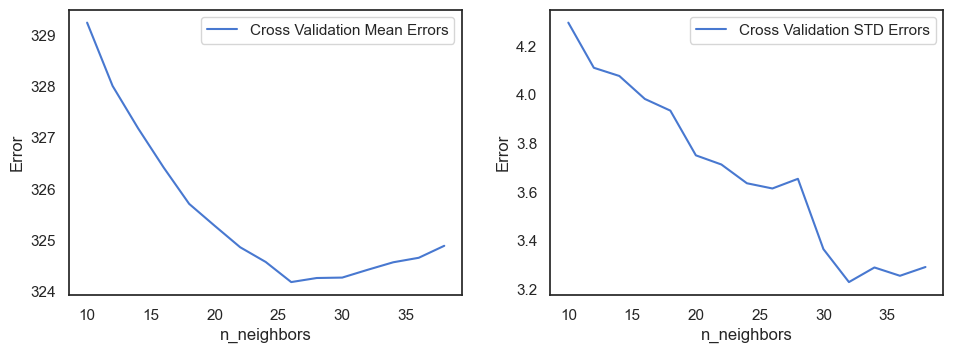

In [102]:
# create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# plot train error in top left subplot
axs[0].plot(N, cv_mean, label='Cross Validation Mean Errors')
axs[0].set_xlabel('n_neighbors')
axs[0].set_ylabel('Error')
axs[0].legend()

# plot test error in top right subplot
axs[1].plot(N, cv_std, label='Cross Validation STD Errors')
axs[1].set_xlabel('n_neighbors')
axs[1].set_ylabel('Error')
axs[1].legend()

# adjust layout and padding
fig.tight_layout(pad=2)

# show the plot
plt.show()


* I will choose N value is 27
* Because the mean reduced in the value of N  is 27 after it overfitting
* The Standared deviation is continuously reducing but the mean of errors is important to handle
* Lets try GridSearchCV to verity the n_neighbors value we found is same

#### GridSearchCV for KNN

In [49]:
x = xtrain[:50000]
y = ytrain[:50000]
param_grid = {'n_neighbors': [21,23,25,27,29,31,33,35,37,39]}
knn = KNN()
tuning = GSCV(knn, param_grid, cv=5)
# Fitting the inputs and target
tuning.fit(x,y)
tuning.best_params_,tuning.best_score_ 

({'n_neighbors': 27}, 0.7029896951759699)

* This GridSearchCV also gives us the value 27 is the best value of n_neighbors
* The best Scores shows 70 % accuracy
* So I will use 27 as the n_neighbors value

#### Fitting n_neighbors Value and Predict

In [50]:
# Saving the params values to the variable
n_n = tuning.best_params_.get('n_neighbors')

# Assigning new datapoints
x = xtrain[50000:100001]
y = ytrain[50000:100001]
xv = xval[10000:20001]
yv=yval[10000:20001]

# Set the n_neighbors values in a variable and predict
knn = KNN(n_neighbors = n_n)
model_test(knn,x,y,xv,yv)

Training Errors :  314.6806349229967
Testing Errors :  327.8691045172821


(314.6806349229967, 327.8691045172821)

* After setting n_neighbors = 27 providing new set of data into it we got much better result than before

## Linear Regression

In [51]:
# set random seed to 42 to ensure when i run this it produced same results every time
import random
random.seed(42)

# Importing Linear Regression library from sklearn
from sklearn.linear_model import LinearRegression

# Creating variable for Linear Regression with normalization
reg = LinearRegression(normalize = True)

### Looking for $R^2$ and ADJ$R^2$ Values
#### The Regression Score function returns $R^2$ value
#### We need to find out the Adj $R^2$ values using the below formula
## $ADJ R^2 = 1-(1-R^2)*(n-1)/(n-p-1)$

In [52]:
 #fit data to linear regression
reg.fit(xtrain,ytrain)

# Finding R2 value
r2 = reg.score(xtrain,ytrain)

# Finding Adj R2 value using formula
n = xtrain.shape[0]
p = xtrain.shape[1]
adj_r2 = 1-(1-r2)*((n-1)/(n-p-1))
print("R^2 Score          : ",r2)
print("Adjusted R^2 Score : ",adj_r2)

R^2 Score          :  0.6274346464627505
Adjusted R^2 Score :  0.627420071819719


* The $R^2$ Score here is almost 63% Efficiency
* The ADJ $R^2$ values are looking same but always ADJ $R^2$ is less than $R^2$

#### Train and Validation Prediction

In [53]:
# Finding errors using function
model_test(reg,xtrain,ytrain,xval,yval)

Training Errors :  365.6702451983682
Testing Errors :  366.1419094721405


(365.6702451983682, 366.1419094721405)

* The train and Validation errors are almost nearest
* Our model have good prediction because the error different across train and validation data
* lets try other assumptions

#### Coefficient Values

In [54]:
# Getting coefficient values
reg.coef_

array([[ 2.18793370e+02,  5.07756929e+14,  5.07756929e+14,
         5.07756929e+14,  9.57090172e+01,  1.64558627e+01,
        -1.11934179e+02, -5.75786603e+01, -1.17722254e+02,
         5.07756929e+14,  5.12989682e+01, -4.00840889e+01,
         2.52679895e+00,  4.35090723e+01]])

* The array valus are the coefficient which we cannot finding what value is for what
* Lets create a DataFrame and check the values and plot it

#### Creating a DataFrame for Coefficient Values

In [55]:
# Creating a Dataframe to store the Coeff values
reg_coeff = pd.DataFrame()
reg_coeff['Features']= inpuT.columns.values
reg_coeff['coeff'] = np.transpose(reg.coef_)

### Coefficient Bar Plot

<BarContainer object of 14 artists>

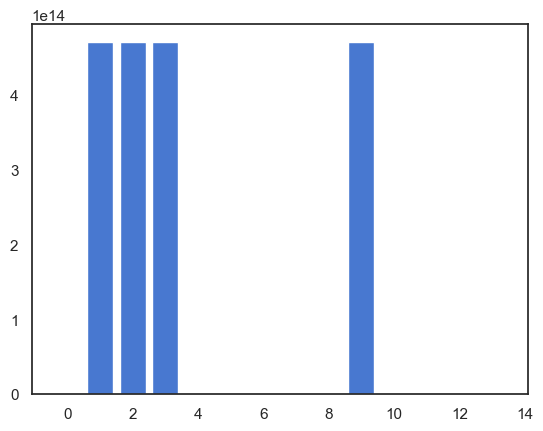

In [110]:
# Plotting coefficients into the barplot
f = reg_coeff.index
w = reg_coeff['coeff']
plt.bar(f,w)

* The Barplot shows weightage of features.
* Most of the features are negative coefficient
* Lets remove around zeros values only because they dont have enough weightage in prediction

In [56]:
# Short the Dataframe and see what are the weighted features
reg_coeff.sort_values(by='coeff',ascending=False)

,Features,coeff
2,cluster_3,5.077569e+14
9,cluster_0,5.077569e+14
3,cluster_2,5.077569e+14
1,cluster_1,5.077569e+14
0,miles,2.187934e+02
4,pickup_periods_afternoon,9.570902e+01
10,day_of_week_4,5.129897e+01
13,day_of_week_3,4.350907e+01
5,month,1.645586e+01
12,hour_of_day,2.526799e+00


* The Dataframe has the feature names as well as weightage
* Here some features has positive values and some features has negative values
* This Coefficient values are normalized by Linear Regression module
* The Coefficient values around 0 has no effect in prediction but values +/- 1 and above values are very much effective

#### Storing Efficient Features Name to the Variable

In [57]:
# Storing Above 1 and below -1 values into the variable
reg_c = reg_coeff[(reg_coeff['coeff'] <-1) | (reg_coeff['coeff']>1)]

# Variable columns
reg_c.Features.values

array(['miles', 'cluster_1', 'cluster_3', 'cluster_2',
       'pickup_periods_afternoon', 'month', 'day_of_week_7',
       'pickup_periods_morning', 'pickup_periods_night', 'cluster_0',
       'day_of_week_4', 'day_of_week_6', 'hour_of_day', 'day_of_week_3'],
      dtype=object)

* The Coefficient value above 1 and below -1 only extracted because coefficient around 0 is not efficient
* Vendor Id is the only feature that not have enough coefficient with trip duration

#### Re Assigning weightage values to the new variables

In [58]:
# Creating Datasets which has only weightage Features
xtrain_l = xtrain[reg_c.Features.values]
xval_l = xval[reg_c.Features.values]
xtest_l = xtest[reg_c.Features.values]

* Here I created new variables and store required features in Train, Validation and Test sets.

### Checking Variance Inflation Factor for Multicollinearity

In [59]:
# Importing Variance Inflation Factor from Stats Models
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables  = xtrain_l
vif = pd.DataFrame()
vif['Features']= xtrain_l.columns.values
vif['VIF'] = [variance_inflation_factor(variables,i)for i in range(variables.shape[1])]

In [60]:
vif.round(3)

,Features,VIF
0,miles,1.590
1,cluster_1,2.157
2,cluster_3,1.957
3,cluster_2,12.830
4,pickup_periods_afternoon,1.631
5,month,1.001
6,day_of_week_7,1.172
7,pickup_periods_morning,2.017
8,pickup_periods_night,1.558
9,cluster_0,11.135


* VIF <5 and >1 is a good values but lessthan 6 somewhat acceptable morethan 6 is not significnt but here all of the values are good VIF

In [61]:
vif_f = vif[vif['VIF']<6]
vif_f.Features.values

array(['miles', 'cluster_1', 'cluster_3', 'pickup_periods_afternoon',
       'month', 'day_of_week_7', 'pickup_periods_morning',
       'pickup_periods_night', 'day_of_week_4', 'day_of_week_6',
       'hour_of_day', 'day_of_week_3'], dtype=object)

In [62]:
# Creating Datasets which has only weightage Features
xtrain_l = xtrain_l[vif_f.Features.values]
xval_l = xval_l[vif_f.Features.values]
xtest_l = xtest_l[vif_f.Features.values]

In [63]:
# Finding errors again
model_test(reg,xtrain_l,ytrain,xval_l,yval)

Training Errors :  366.31264063281986
Testing Errors :  366.80534374106344


(366.31264063281986, 366.80534374106344)

* Train and Test score after removing one features
* The same error again so the removed feature not significant

In [64]:
# Fit the model
reg.fit(xtrain_l,ytrain)

# Finding R2 value
r2 = reg.score(xtrain_l,ytrain)

# Finding Adj R2 value using formula
n = xtrain_l.shape[0]
p = xtrain_l.shape[1]
adj_r2 = 1-(1-r2)*((n-1)/(n-p-1))
print("R^2 Score          : ",r2)
print("Adjusted R^2 Score : ",adj_r2)

R^2 Score          :  0.6261244796557575
Adjusted R^2 Score :  0.6261119432432254


* Removing unweightage features is very important because this features not have any effect in prediction
* This will increase Computational speed and model runs smoothly

#### Scatter Plot for Residuals

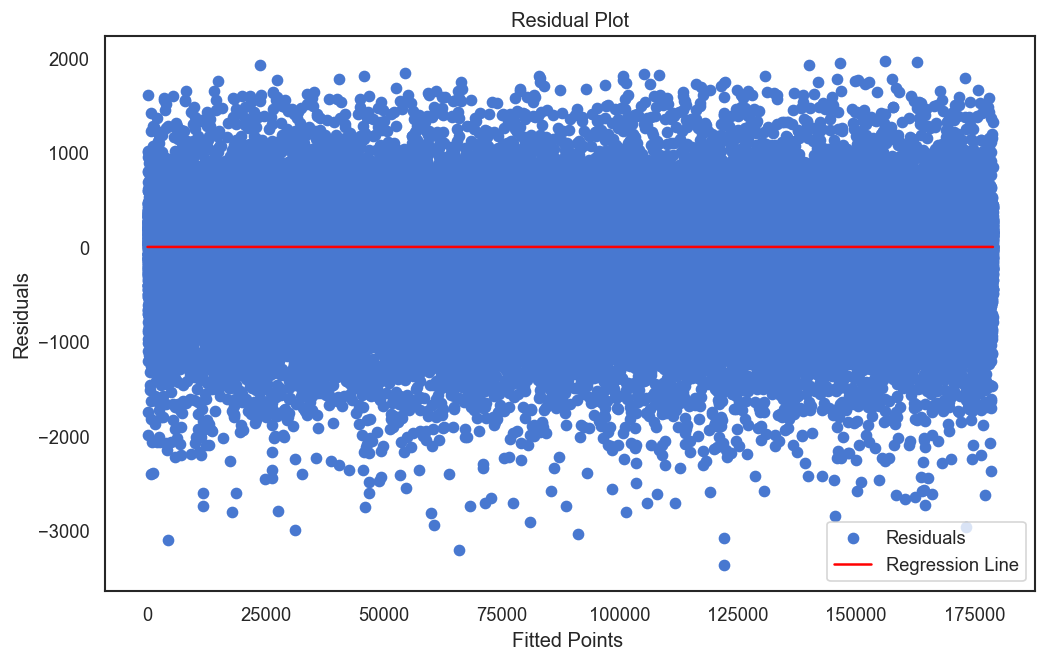

In [120]:
# Predict the validation set
pred = reg.predict(xval_l)

# Calculation difference to the variable residuals
residuals = pred - yval

# Plotting Residuals values in the plot to verify the Assumptions
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')

# For f and k is length of the data
f = range(0,178946)
k = [0 for i in range(0,178946)]
plt.scatter( f, residuals, label = 'Residuals')
plt.plot( f, k , color = 'red', label = 'Regression Line' )
plt.xlabel('Fitted Points ')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()

* The Errors are spreaded across the Regression Line
* There is no any patterns and variations in Errors
* This is Heteroskedasticity

#### Hist Plot for Residuals

<AxesSubplot:ylabel='Count'>

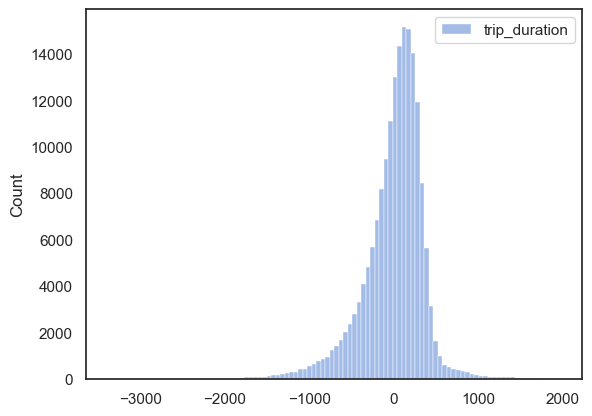

In [121]:
sns.histplot(residuals,bins=100)

* The Histplot for error distribution is normally distributed
* All the values around the mean 0 which is high

#### Assumptions
       * Features and Target relationships has Linear Relationship
       * Homoscedasticity, it means errors has constant variance
       * There is no Multicollinearity Checked by VIF
       * The Residuals are Normal distribution

## Decision Tree Regressor

In [65]:
# Importing Necessary Library
from sklearn.tree import DecisionTreeRegressor

In [66]:
# Assigning Variable for Regressor and fit data 
DTR = DecisionTreeRegressor(random_state=44)
model_test(DTR,xtrain,ytrain,xval,yval)

Training Errors :  1.207469675468341
Testing Errors :  441.5211019363227


(1.207469675468341, 441.5211019363227)

* The Decision Tree Regressor Predicts good in Training Data but not in Validation Data
* The Error of Training is almost 0 but Validation Error rate is high
* Tuning hyper parameter will predict good results

In [67]:
# Fit the model
DTR.fit(xtrain,ytrain)

# Finding R2 value
r2 = DTR.score(xtrain,ytrain)

# Finding Adj R2 value using formula
n = xtrain.shape[0]
p = xtrain.shape[1]
adj_r2 = 1-(1-r2)*((n-1)/(n-p-1))
print("R^2 Score          : ",r2)
print("Adjusted R^2 Score : ",adj_r2)
print("R^2 Score for Testing Data : ",DTR.score(xval,yval))

R^2 Score          :  0.9999959376654655
Adjusted R^2 Score :  0.9999959375065481
R^2 Score for Testing Data :  0.45734779791342317


* The $R^2$ score is 99.99% for the Training Dataset but Validation Data is worst score

* The $R^2$ score is 46% for the Testing Data
* Which is far away from training score
* Lets Tuning the parameters to achieve best result

In [125]:
# Checking the Max Depth value
DTR.tree_.max_depth

59

* The max_depth automatically selected by model is 47 we need to findout the Correct Parameters to acheive good result

#### Future Importance

In [68]:
print(DTR.feature_importances_)
print(DTR.feature_names_in_)

[0.83039752 0.00263562 0.0034214  0.00554941 0.00277328 0.03167736
 0.01131256 0.00111526 0.00133896 0.00609282 0.0056185  0.00969836
 0.08297223 0.00539672]
['miles' 'cluster_1' 'cluster_3' 'cluster_2' 'pickup_periods_afternoon'
 'month' 'day_of_week_7' 'pickup_periods_morning' 'pickup_periods_night'
 'cluster_0' 'day_of_week_4' 'day_of_week_6' 'hour_of_day' 'day_of_week_3']


* The above array shows us the variable importance score
* Creating Dataframe to interprete the values to find variables

In [69]:
Features = np.transpose(DTR.feature_names_in_)
Scores = np.transpose(DTR.feature_importances_)
values = pd.DataFrame({'Features' : Features,
                      'Scores' : Scores})
values.sort_values(by='Scores',ascending=False)

,Features,Scores
0,miles,0.830398
12,hour_of_day,0.082972
5,month,0.031677
6,day_of_week_7,0.011313
11,day_of_week_6,0.009698
9,cluster_0,0.006093
10,day_of_week_4,0.005618
3,cluster_2,0.005549
13,day_of_week_3,0.005397
2,cluster_3,0.003421


* The Decision Tree features importance score are showing above which is lot scores are below 1% of importance
* Lets clear less than one scores but befor plot and visualize the importance values

<BarContainer object of 14 artists>

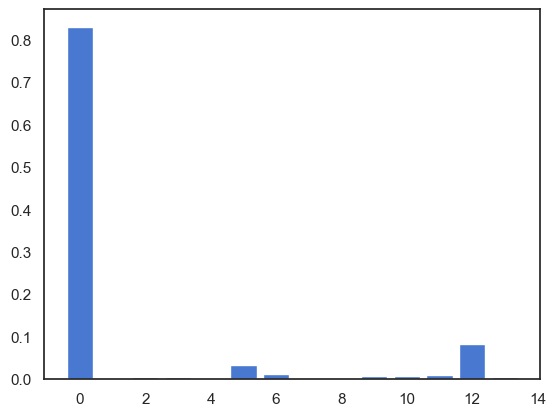

In [128]:
plt.bar(values.Features.index,values.Scores)

* The miles only has 83% of importance in prediction using Decision Tree

In [70]:
values[values['Scores']>0.01]

,Features,Scores
0,miles,0.830398
5,month,0.031677
6,day_of_week_7,0.011313
12,hour_of_day,0.082972


* Only 4 of them have significant assigning values because all other values are below 1 % so we dont need it

In [71]:
values_f = values[values['Scores']>0.01]
values_f.Features.values

array(['miles', 'month', 'day_of_week_7', 'hour_of_day'], dtype=object)

#### Re Assigning weightage values to the new variables

In [72]:
xtrain_D = xtrain[values_f.Features.values]
xtest_D = xtest[values_f.Features.values]
xval_D = xval[values_f.Features.values]#### Re Assigning weightage values to the new variables

### Hyper Parameter Tuning for Decision Tree Regressor

In [74]:
# Here i select 50000 Datapoint for tuning
x = xtrain_D[:50000]
y = ytrain[:50000]
n = range(10,100,5)
d = range(2,20)
# Assigning Maximul Leaf nodes and maximum depth
DT = {'max_leaf_nodes' : n, 'max_depth' : d}

# Lets use GridSearchCV to tuning the good values
tuning = GSCV(estimator = DecisionTreeRegressor(), param_grid=DT,scoring='r2')

# Fitting the inputs and target
tuning.fit(x,y)
tuning.best_params_,tuning.best_score_ 

({'max_depth': 9, 'max_leaf_nodes': 95}, 0.697428226684832)

* Here we get the tuning parameter returns best values of max_leaf_nodes and max_depth parameters

In [75]:
mln = tuning.best_params_.get('max_leaf_nodes')
mdd = tuning.best_params_.get('max_depth')
# Do the same regression again with the tuning parameters and see the result
DTR = DecisionTreeRegressor(max_depth = mdd,max_leaf_nodes=mln, random_state=44)
model_test(DTR,xtrain_D,ytrain,xval_D,yval)

Training Errors :  324.53301690817455
Testing Errors :  327.00726930009154


(324.53301690817455, 327.00726930009154)

* The result we get is better than before
* We get training and testing errors Its not a big different
* So the model is good enough with the parameters

In [76]:
DTR.fit(xtrain_D,ytrain)
DTR.score(xtrain_D,ytrain), DTR.score(xval_D,yval)

(0.7065453513103683, 0.7023311059638244)

* The score is for training and testing sets almost same score

### Plotting the Decision Tree

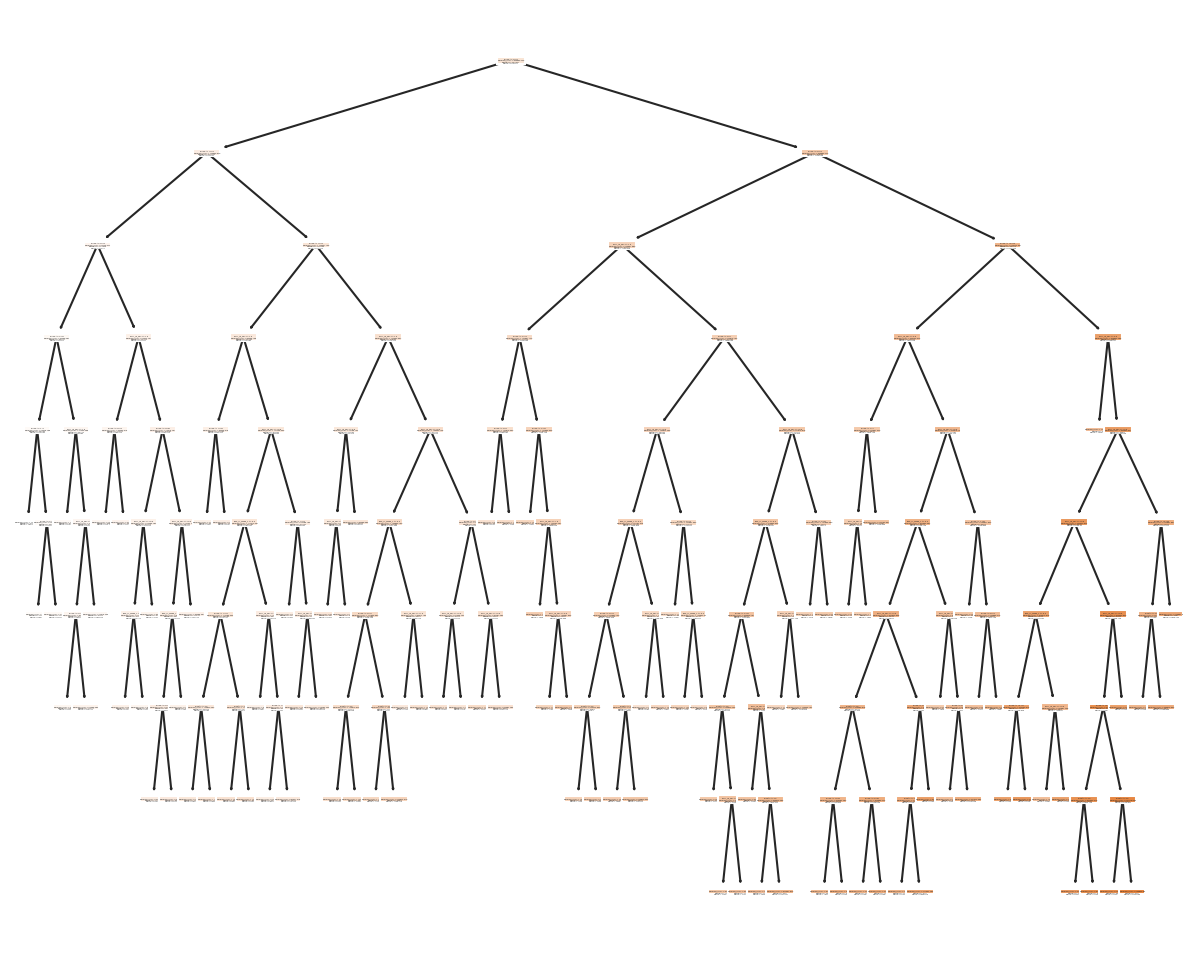

In [135]:
from sklearn.tree import plot_tree, export_text
x = xtrain_D
y = ytrain
DTR.fit(x,y)
plt.figure(figsize=(10,8), dpi=150)
plot_tree(DTR, feature_names=xtrain_D.columns,max_depth=12,filled=True);

* The above decision tree looking good with 95 nodes

## Gradient Boosting Regressor

In [77]:
# Importing relevent library
from sklearn.ensemble import GradientBoostingRegressor

# Select variable for gradient boosting and setting parameter as shown below
gbr = GradientBoostingRegressor(learning_rate=0.1,max_depth=2,n_estimators=5)

In [78]:
model_test(gbr,xtrain,ytrain,xval,yval)

Training Errors :  468.4406499333208
Testing Errors :  468.94958576552824


(468.4406499333208, 468.94958576552824)

* The Training errors and Validation errors are same but the value is very high
* Reducing the errors we can do hyper parameter tuning
* Changing the learning rate, estimater and max depth to achieve more better results

In [79]:
# Fit the model
gbr.fit(xtrain,ytrain)

# Finding R2 value
r2 = gbr.score(xtrain,ytrain)

# Finding Adj R2 value using formula
n = xtrain.shape[0]
p = xtrain.shape[1]
adj_r2 = 1-(1-r2)*((n-1)/(n-p-1))
print("R^2 Score          : ",r2)
print("Adjusted R^2 Score : ",adj_r2)

R^2 Score          :  0.3885902369772184
Adjusted R^2 Score :  0.38856631881371395


### * The $R^2$ and ADJ $R^2$   score is around 39 % Which is not the significant score

### Checking Features Importance

<BarContainer object of 14 artists>

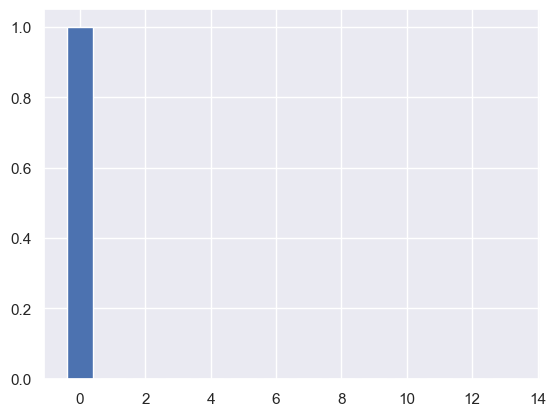

In [82]:
feature = np.transpose(gbr.feature_importances_)
plt.bar(range(len(xtrain.columns)),feature)

* This GBR technique the highest feature importance value is only one features, others are not have

In [83]:
# Creating dataframe to store values
gbr_val = pd.DataFrame()
gbr_val['Features'] = xtrain.columns.values
gbr_val['Score'] = feature

In [84]:
# Checking the values
gbr_val

,Features,Score
0,miles,1.0
1,cluster_1,0.0
2,cluster_3,0.0
3,cluster_2,0.0
4,pickup_periods_afternoon,0.0
5,month,0.0
6,day_of_week_7,0.0
7,pickup_periods_morning,0.0
8,pickup_periods_night,0.0
9,cluster_0,0.0


* Here miles features only has the score of 1 others not
* lets remove all other features

In [85]:
gbr_val = gbr_val[gbr_val['Score']>0]
gbr_val.sort_values(by='Score', ascending=False)

,Features,Score
0,miles,1.0


* Here filtered only the value is above 0
* We got only one miles features

### Assigning the only feature into the new variable

In [86]:
xtrain_g = xtrain[gbr_val.Features.values]
xval_g = xval[gbr_val.Features.values]
xtest_g = xtest[gbr_val.Features.values]

In [87]:
# Fit the data and predict training set
model_test(gbr,xtrain_g,ytrain,xval_g,yval)

Training Errors :  468.44064993330994
Testing Errors :  468.9495857655174


(468.44064993330994, 468.9495857655174)

* With all the feature we get same
                    Training Errors :  468.44064993331386
                    Validation Errors :  468.9495857655214
* With removing all the feature except miles and get almost same result

### Tuning the Hyper Parameters
* Tuning the learning rate and estimators to predict even more accurate result

In [88]:
# Here i select 50000 Datapoint for tuning
x = xtrain_g[:50000]
y = ytrain[:50000]

# Assigning Learning rate and estimators
LR = {'learning_rate' : [0.05,0.1,0.15,0.2,0.3],'n_estimators' : [60,70,80,90,100], 'max_depth' :[1,2,3,4,5]}

# Lets use GridSearchCV to tuning the good values
tuning = GSCV(estimator = GradientBoostingRegressor(), param_grid=LR,scoring='r2')

# Fitting the inputs and target
tuning.fit(x,y)

tuning.best_params_,tuning.best_score_ 

({'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 70},
 0.6373983729662998)

* Using GridSearchCV with only 50,000 datapoints we get 
                        learning rate : 0.1  
                        n_estimator   : 70
                        max_depth     : 2
* Lets use this parameters to the model

In [89]:
# getting tuning parameter values to the variable to interprete it
lr_g = tuning.best_params_.get('learning_rate')
ne = tuning.best_params_.get('n_estimators')
md_g = tuning.best_params_.get('max_depth')

# Fit the parameters and predict training set
gbr = GradientBoostingRegressor(learning_rate=lr_g,max_depth=md_g,n_estimators=ne)
model_test(gbr,xtrain_g,ytrain,xval_g,yval)

Training Errors :  357.54520171375117
Testing Errors :  358.7599720628174


(357.54520171375117, 358.7599720628174)

* After Tuning the parameters of Gradient Boosting Regressor with only one predictor we got a decent errors
* The Training and Validation Errors is very less differences

## Lets Check the Errors for Test set
### This 25% of Test set will use here not used before for any tests

### KNN

In [147]:
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(357891, 14) (357891, 1)
(178946, 14) (178946, 1)


In [90]:
# Assigning variable for knn and set n_neighbors value and fitting
knn = KNN(n_neighbors= n_n)
knn_tr_error,knn_te_error = model_test(knn,xtrain,ytrain,xtest,ytest)

Training Errors :  301.2953689665922
Testing Errors :  315.2574043315414


* Training and Testing Errors for K Nearest Neighbors

### Linear Regression

In [91]:
print(xtrain_l.shape,ytrain.shape)
print(xtest_l.shape,ytest.shape)

(357891, 12) (357891, 1)
(178946, 12) (178946, 1)


In [92]:
# Assigning variable for Linear Regression and fitting
reg = LinearRegression(normalize=True)
lin_tr_error,lin_te_error = model_test(reg,xtrain_l,ytrain,xtest_l,ytest)

Training Errors :  366.31264063281986
Testing Errors :  368.85512950197887


* Training and Testing Errors for Linear Regression

### Decision Tree Regressor

In [93]:
print(xtrain_D.shape,ytrain.shape)
print(xtest_D.shape,ytest.shape)

(357891, 4) (357891, 1)
(178946, 4) (178946, 1)


In [94]:
# Assigning variable for Decision Tree Regressor and set parameters and fitting the data
DTR = DecisionTreeRegressor(max_depth = mdd,max_leaf_nodes=mln, random_state=44)
dtr_tr_error,dtr_te_error = model_test(DTR,xtrain_D,ytrain,xtest_D,ytest)

Training Errors :  324.53301690817455
Testing Errors :  328.1008469151658


* Training and Testing Errors for Decision Tree Regressor

### Gradient Boosting Regressor

In [95]:
print(xtrain_g.shape,ytrain.shape)
print(xtest_g.shape,ytest.shape)

(357891, 1) (357891, 1)
(178946, 1) (178946, 1)


In [96]:
# Fit the parameters and predict training set
gbr = GradientBoostingRegressor(learning_rate=lr_g,max_depth=md_g,n_estimators=ne)
gbr_tr_error,gbr_te_error = model_test(gbr,xtrain_g,ytrain,xtest_g,ytest)

Training Errors :  357.54520171375117
Testing Errors :  360.2539935693657


* Training and Testing Errors for Gradient Boosting Regressor

## Bar Plot for All Models Training and Testing Errors

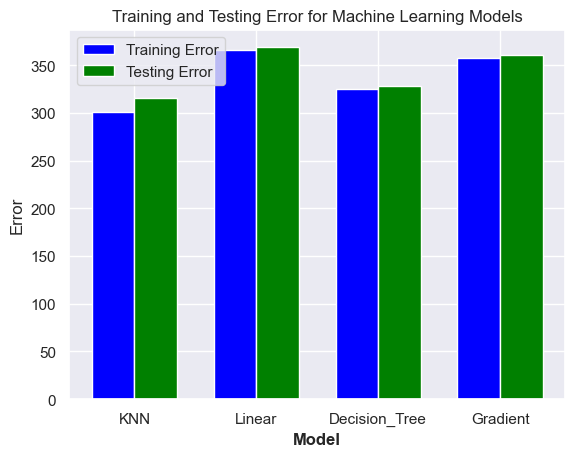

In [97]:
# Generate example data
train_error = np.array([knn_tr_error,lin_tr_error,dtr_tr_error,gbr_tr_error])
test_error = np.array([knn_te_error,lin_te_error,dtr_te_error,gbr_te_error])
models = ['KNN', 'Linear', 'Decision_Tree', 'Gradient']

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(train_error))
r2 = [x + bar_width for x in r1]

# Create the bar plot
plt.bar(r1, train_error, color='blue', width=bar_width, edgecolor='white', label='Training Error')
plt.bar(r2, test_error, color='green', width=bar_width, edgecolor='white', label='Testing Error')

# Add xticks on the middle of the group bars
plt.xlabel('Model', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(train_error))], models)

# Add y-axis label and title
plt.ylabel('Error')
plt.title('Training and Testing Error for Machine Learning Models')

# Add legend and show the plot
plt.legend()
plt.show()

* This Barplots of All models errors are shown
* The best model is KNN because its prediction is lowest errors comparing all other models
* The second best is the Decision Tree regressor
* The Gradient Boosting Regresson finding good prediction with only one Feature miles
* The Linear Regression Score is Little much High Comparing other models

## Conclusion

* Machine learning is a field of artificial intelligence that deals with the design and development of algorithms that can learn from and make predictions on data. The aim of machine learning is to automate analytical model building and enable computers to learn from data without being explicitly programmed to do so.
* This is a supervised learning with their advantages are using different techniques of learning process and hyper parameter tuning is improved their efficiency across test data.
* Here used 4 types of models which predicted result without modification will result high errors in testing data. using different techniques like Elbow method and Parameter tuning using Gridsearch is producing better prediction
* Plotting all data related informations and insights are mostly usefull to finding better result
* The cleaning and Preprocessing is time taking process which is the important part to removing outliers and getting different datas into the dataset.
* According to the machine learning process less than 5% of data removal is ok because Total Data is 729322 after clearing outliers we get 715783. Loss of Data is 13539 which is 1.8% of datas.
* The removing outliers conditions are explained about the insights of outliers and boxplots.
* Here I used 4 models which is Linear Regression, K Nearest Neighbors Algorithm, Gradient Boosting Regressor, and Decision Tree
* The Bar plot shown all the model training and testing errors.

In [98]:
import pickle

#### Name : Mohaideen Abdul Kader
#### Email : mohai.2007@gmail.com
#### Project : NYC Taxi Trip Duration Prediction
#### Date : 10/03/2023